## Описание класса **BestForecaster**

Класс `BestForecaster` представляет собой комплексный инструмент для прогнозирования временных рядов продаж товаров на уровне магазина с использованием градиентного бустинга (библиотека CatBoost). Он позволяет выполнять весь процесс: от загрузки и подготовки данных до обучения/загрузки моделей, генерации прогнозов, их оценки и визуализации.

### Основная Цель

Автоматизация процесса получения прогнозов продаж для одного или нескольких товаров магазина на различные временные горизонты (неделя, месяц, квартал), обеспечивая при этом гибкость в работе с моделями (использование предобученных или же обучение новых).

### Методы

1.  **`__init__`**:
      Инициализирует класс BestForecaster.

2.  **`load_and_preprocess_data`**:
      Загружает и предобрабатывает данные о продажах, ценах и календаре. Выполняет объединение данных, фильтрацию по магазину, обработку пропусков (интерполяция, ffill/bfill), агрегацию по дням и создание базовых календарных признаков. Сбрасывает состояние предыдущих запусков (модели, прогнозы и т.д.).

3.  **`add_time_features`**:
      Добавляет временные признаки (лаги, скользящие окна, календарные) в DataFrame.Предполагается, что входной DataFrame `data` имеет DatetimeIndex и столбцы 'cnt' и опционально 'sell_price', 'dayofweek', 'month', 'year', 'is_weekend', 'event_type_1', 'event_type_2'.

4.  **`_ensure_data_split`**:
      Разделяет данные на обучающую и тестовую выборки, если это еще не сделано.Выполняет разделение для данных по каждому товару (`items_data`) и для агрегированных данных (`data`). Обновляет атрибуты `data_split`,`split_results`, `train_data`, `test_data` и `items`.
5. **`_prepare_features_targets`**:
      Подготавливает наборы признаков (X) и целевой переменной (y) для обучения/оценки. Использует данные из `split_results` (для товара) или `train_data`/`test_data` (для агрегата). Списки признаков (`self.features`, `self.cat_features`) должны быть определены ранее вызовом`add_time_features`.

5.  **`_load_model`, `_train_catboost_model`**:
      Загружаем сохраненную модель CatBoost из файла или обучает модель CatBoostRegressor с нуля, сохраняем ее в файл и сохраняем атрибуты класса.

6.  **`_prepare_for_prediction`**:
      Подготавливает все необходимое для запуска итеративного прогнозирования.Загружает или обучает модель, определяет базовую историю (train set или все данные) и дату начала прогноза.

7.  **`predict`**:
      Генерирует прогнозы итеративно на заданный горизонт. Использует переданную модель, базовую историю и дату старта. Не выполняет загрузку/обучение модели или определение истории.

8.  **`evaluate`**:
      Оценивает качество прогноза на тестовой выборке. Сравнивает сохраненный прогноз (`self.forecasts`) с соответствующей частью тестовой выборки (`self.test_data` или `self.split_results`). Расчет возможен только если данные были разделены (`self.data_split`).

9.  **`visualize_forecast`**:
      Визуализирует прогноз, фактические данные и недавнюю историю. Отображает хвост исторических данных, предшествующих прогнозу, фактические данные на период прогноза (если доступны) и сам прогноз.

10. **`predict_item`, `predict_all_items`**:
      Выполняет полный цикл обработки для одного товара или агрегированных данных. Включает подготовку (загрузка/обучение модели, определение истории и старта), генерацию прогнозов на заданные горизонты, оценку (если применимо) и визуализацию.
      All items - прогнозирования для всех (или ограниченного числа) валидных товаров магазина.

### Входные Данные

*   Пути к CSV файлам: `sales`, `prices`, `dates`.
*   `store_id`: Идентификатор магазина.
*   `models_dir`: Путь к папке с моделями.

### Выходные Данные

*   **Агрегированные прогнозы:** Возвращаются методом `predict_all_items` в виде словаря `{horizon: pd.DataFrame}`.
*   **Метрики:** Выводятся в консоль во время выполнения и сохраняются в атрибуте `self.metrics`.
*   **Визуализации:** Графики `matplotlib` отображаются во время выполнения.
*   **Сохраненные модели:** Новые обученные модели сохраняются в виде `.cbm` файлов в `models_dir`.
*   **Логи выполнения:** Информационные сообщения, предупреждения и ошибки выводятся в консоль.

## Запуск предсказаний

D:\setup\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


--- Запуск скрипта прогнозирования ---
Прогнозировщик для директории 'models' инициализирован.

Загрузка и предобработка данных для магазина: STORE_1...
Данные отфильтрованы по магазину: STORE_1
Найдено 15 уникальных товаров в магазине STORE_1
Данные загружены и предобработаны для 15 товаров.
Период данных: 2011-01-29 по 2016-01-21

Запуск обработки для 15 товаров магазина STORE_1...
Разделение данных выполнено (test_size=0.2). Обрабатывается 15 товаров.

Запуск обработки для 15 товаров...

>>> Товар: STORE_1_064 (1/15) <<<

--- Обработка  товара STORE_1_064 ---
Модель успешно загружена: models\catboost_STORE_1_064_cnt_model.cbm
Использование предобученной модели для товара STORE_1_064.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_064 (старт: 2016-01-22)...


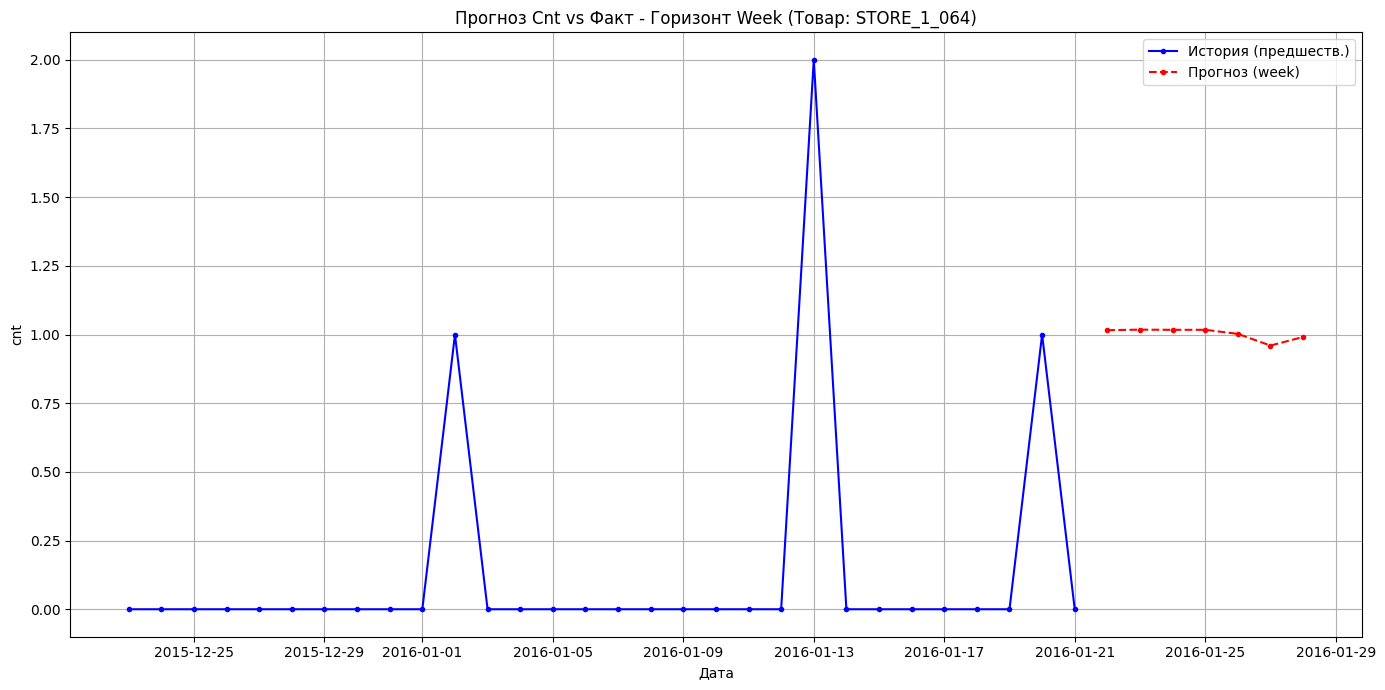

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_064 (старт: 2016-01-22)...


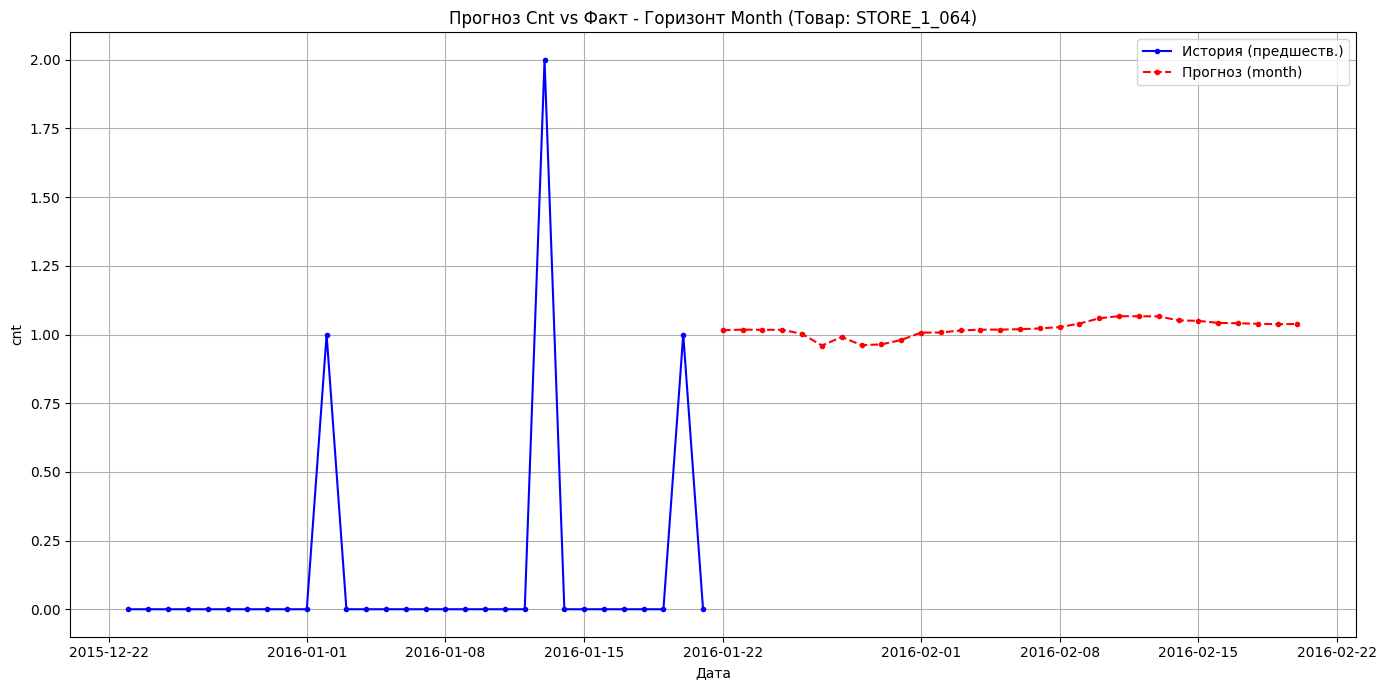

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_064 (старт: 2016-01-22)...


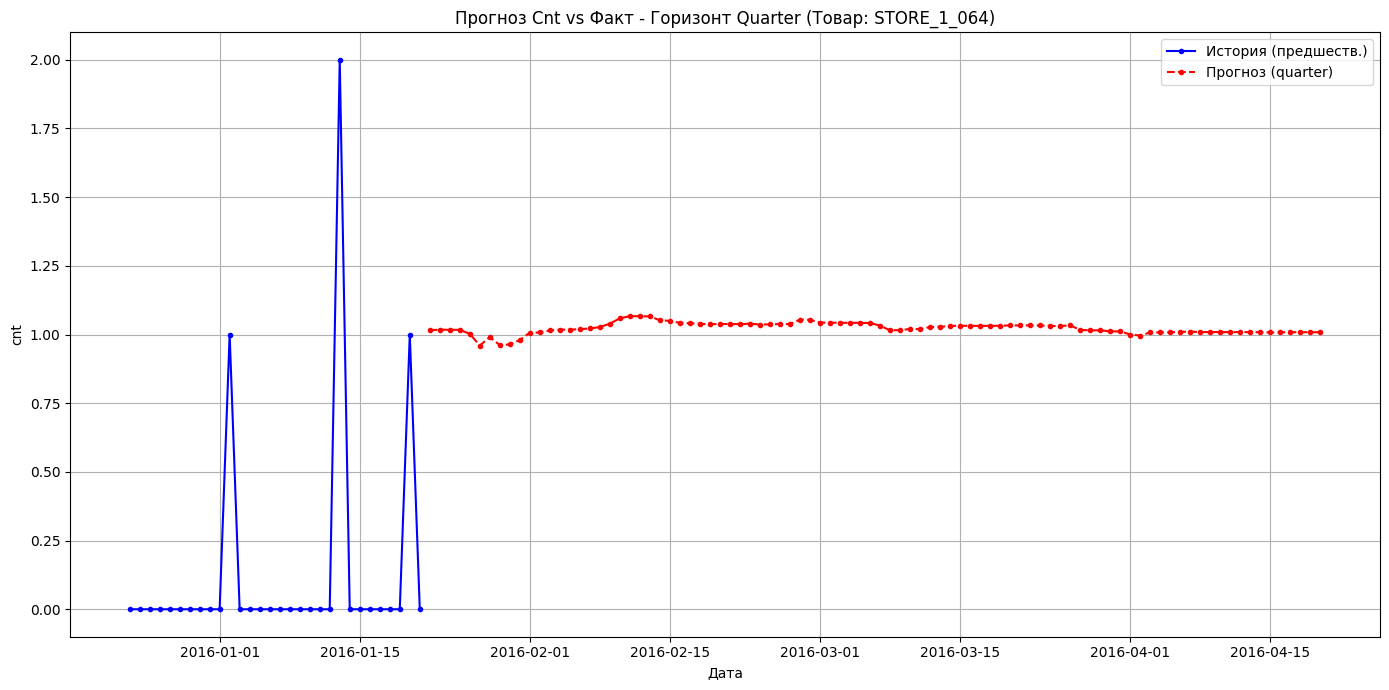


Оценка загруженной модели товара STORE_1_064 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_064_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_064_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_064_cnt_quarter.

>>> Товар: STORE_1_065 (2/15) <<<

--- Обработка  товара STORE_1_065 ---
Модель успешно загружена: models\catboost_STORE_1_065_cnt_model.cbm
Использование предобученной модели для товара STORE_1_065.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_065 (старт: 2016-01-22)...


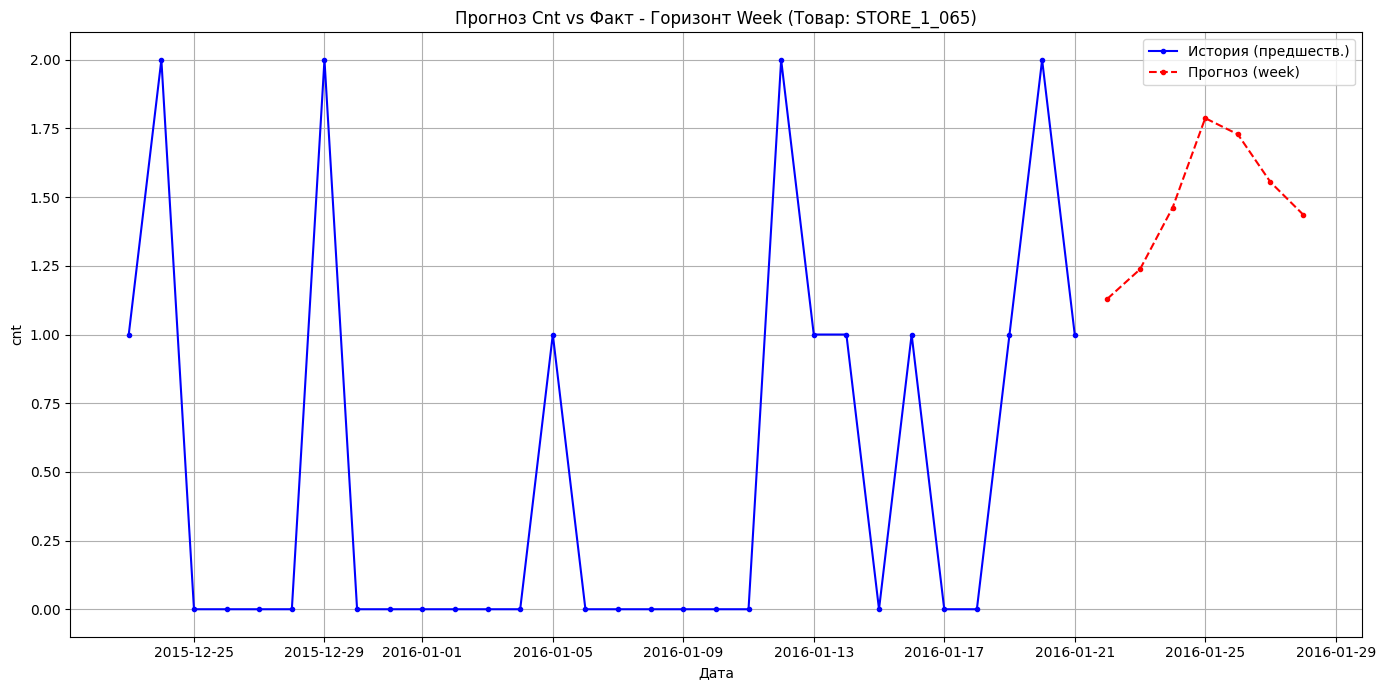

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_065 (старт: 2016-01-22)...


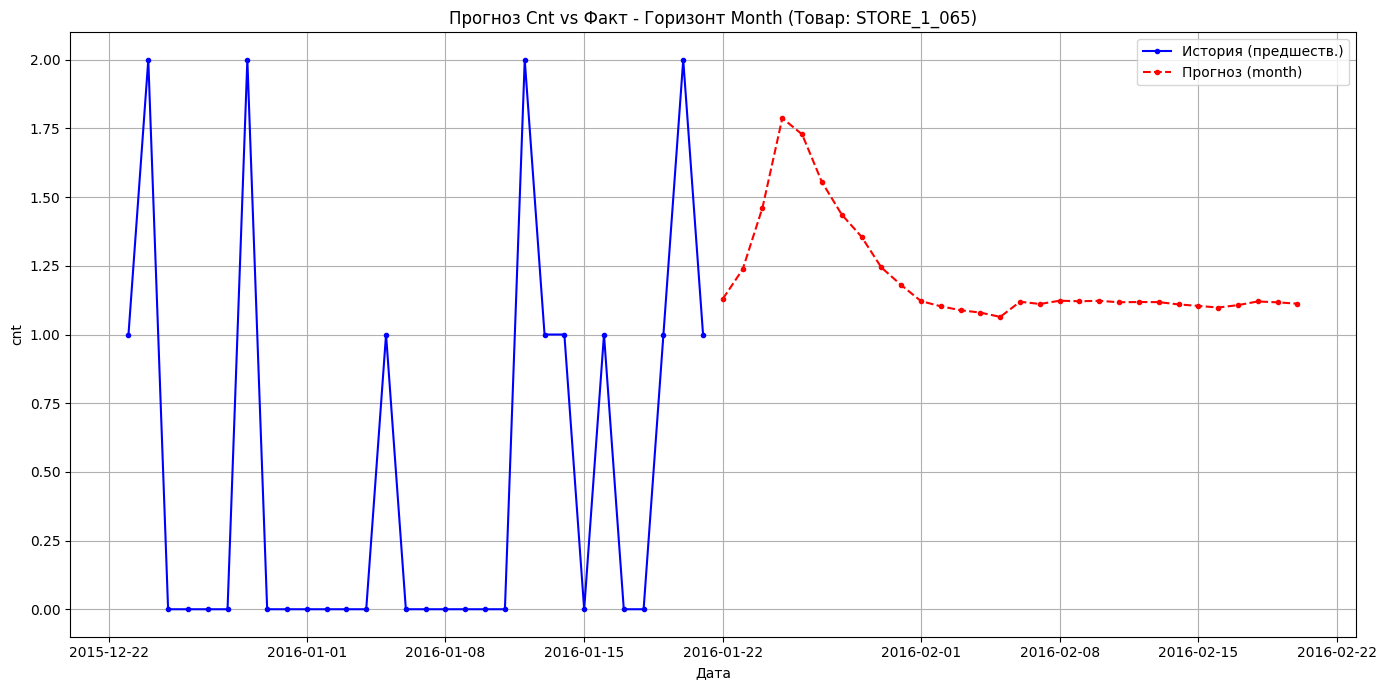

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_065 (старт: 2016-01-22)...


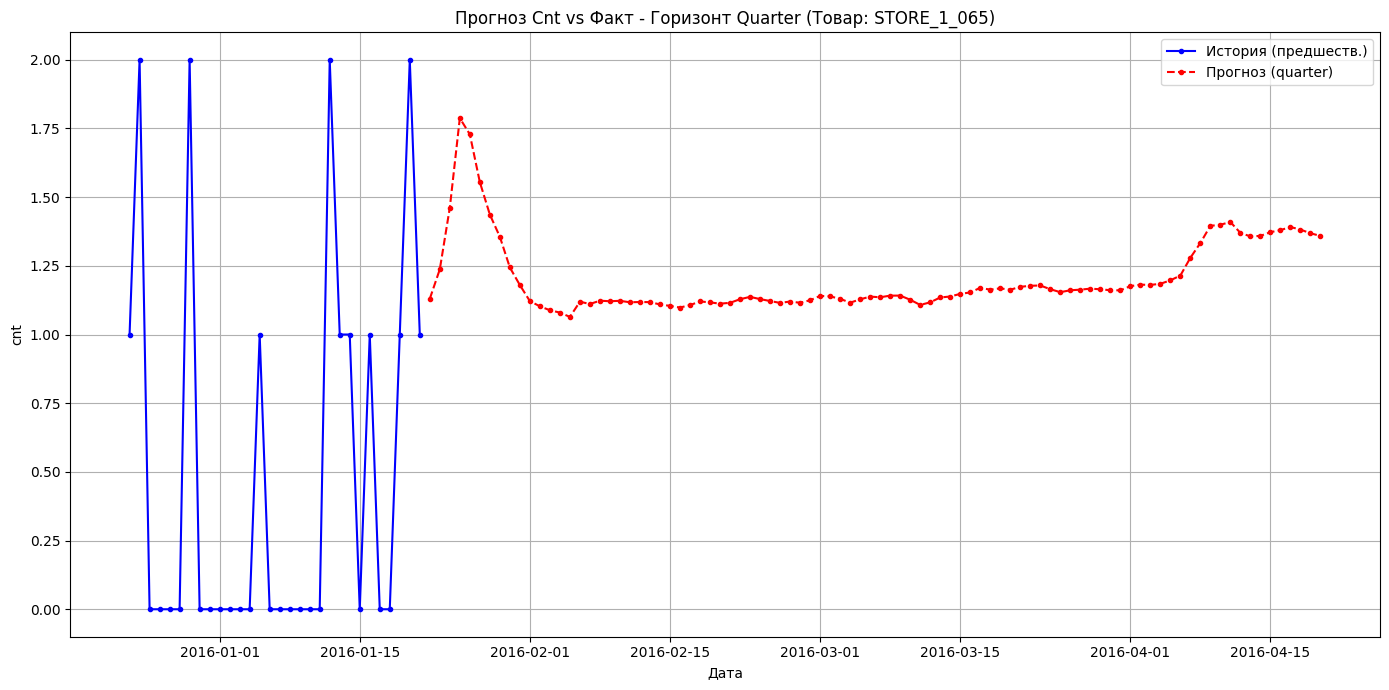


Оценка загруженной модели товара STORE_1_065 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_065_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_065_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_065_cnt_quarter.

>>> Товар: STORE_1_325 (3/15) <<<

--- Обработка  товара STORE_1_325 ---
Модель успешно загружена: models\catboost_STORE_1_325_cnt_model.cbm
Использование предобученной модели для товара STORE_1_325.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_325 (старт: 2016-01-22)...


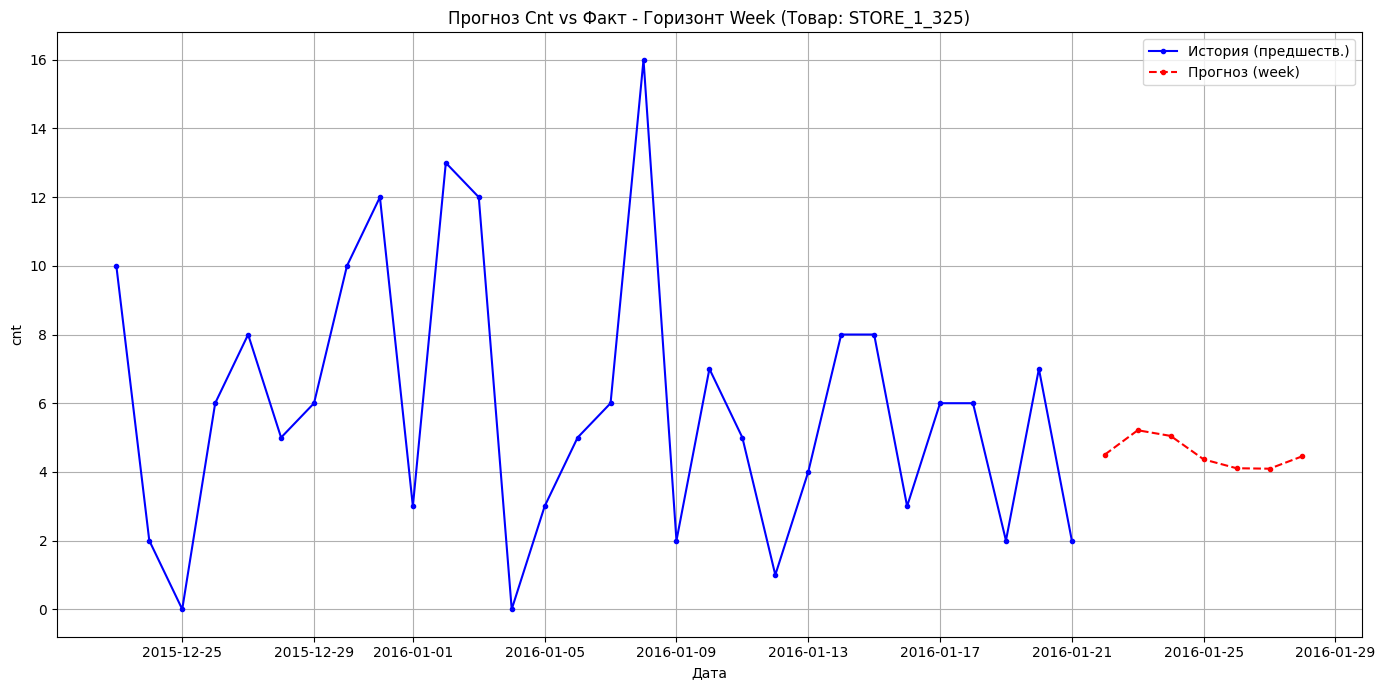

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_325 (старт: 2016-01-22)...


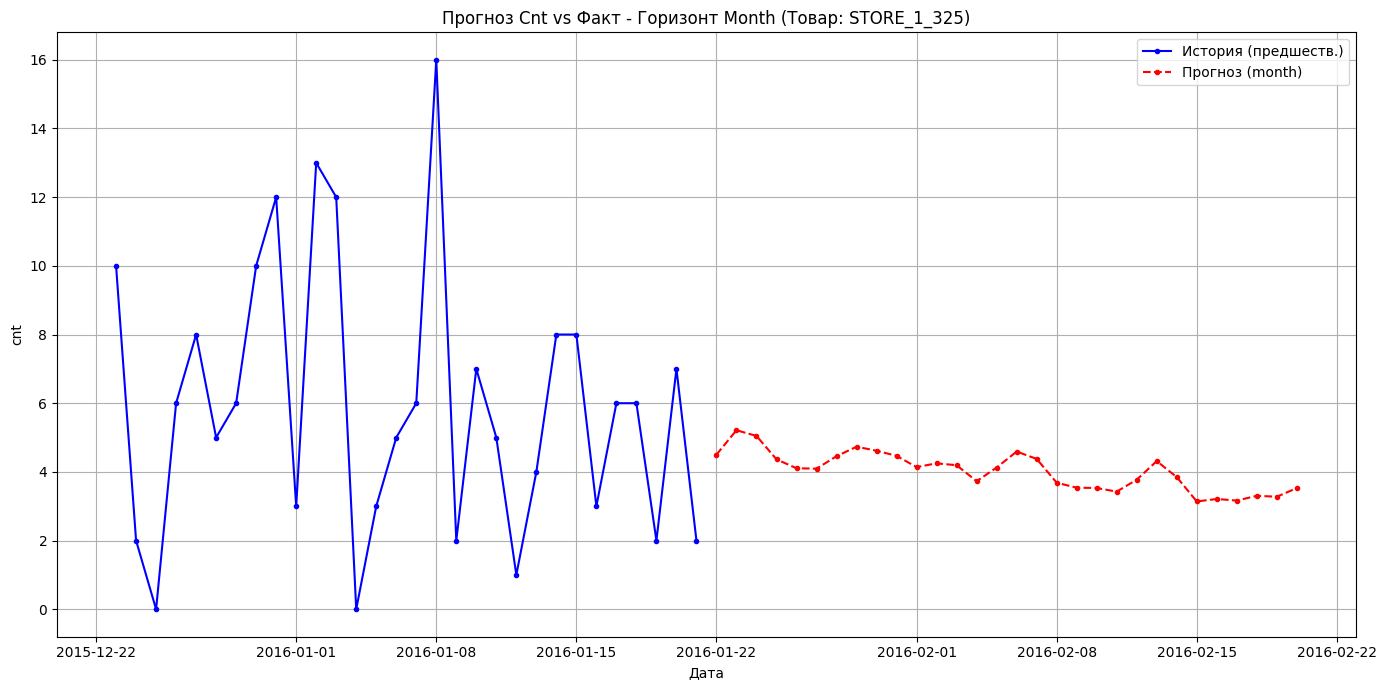

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_325 (старт: 2016-01-22)...


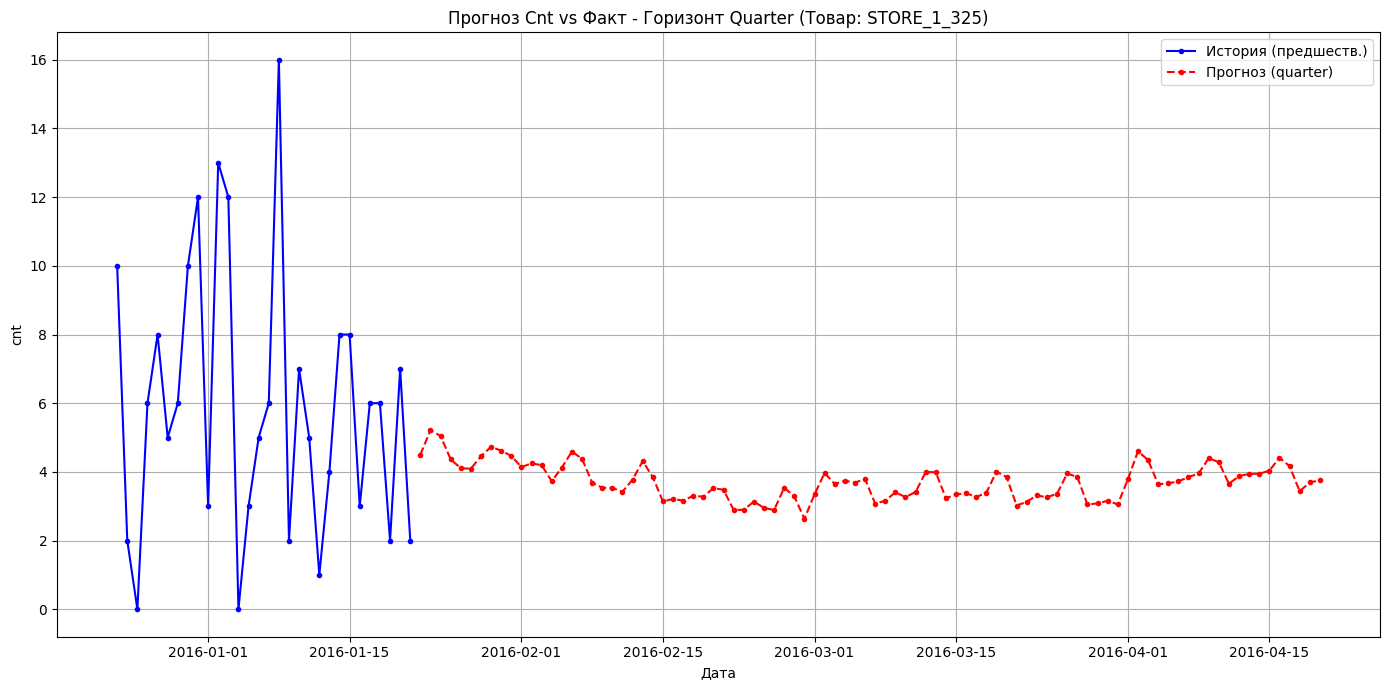


Оценка загруженной модели товара STORE_1_325 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_325_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_325_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_325_cnt_quarter.

>>> Товар: STORE_1_376 (4/15) <<<

--- Обработка  товара STORE_1_376 ---
Модель успешно загружена: models\catboost_STORE_1_376_cnt_model.cbm
Использование предобученной модели для товара STORE_1_376.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_376 (старт: 2016-01-22)...


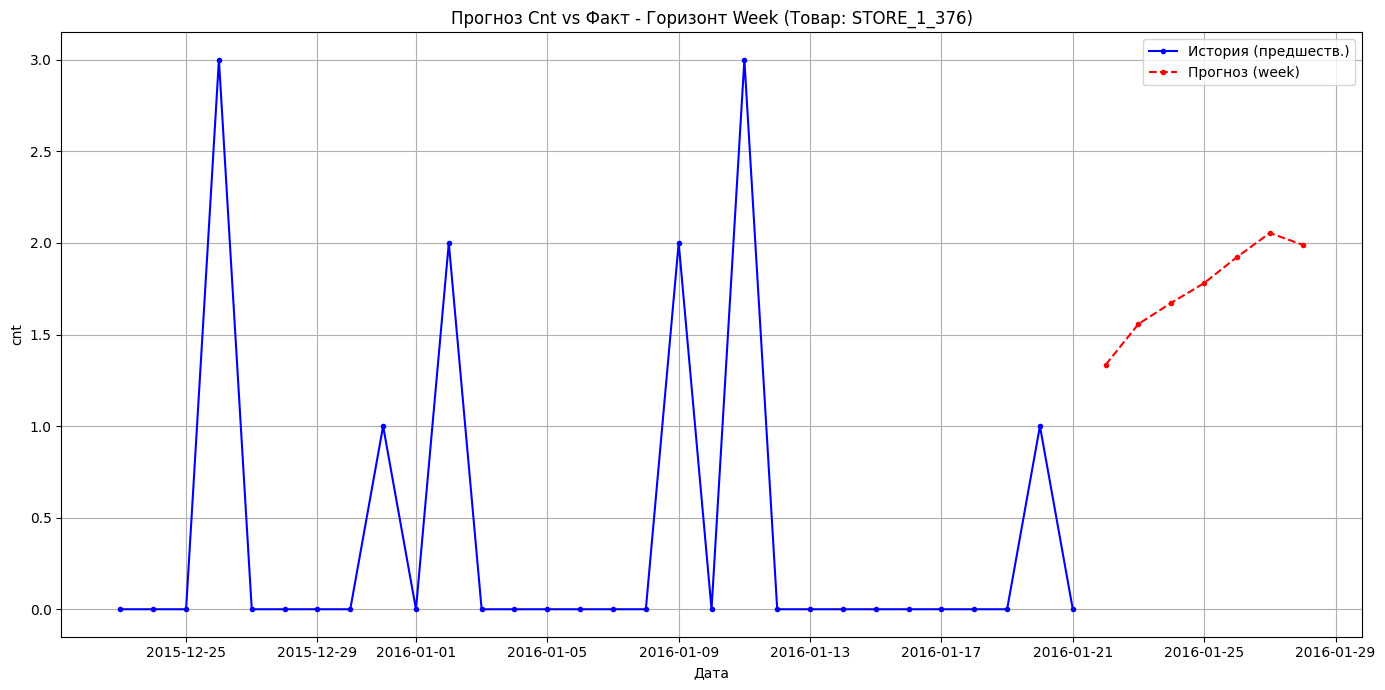

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_376 (старт: 2016-01-22)...


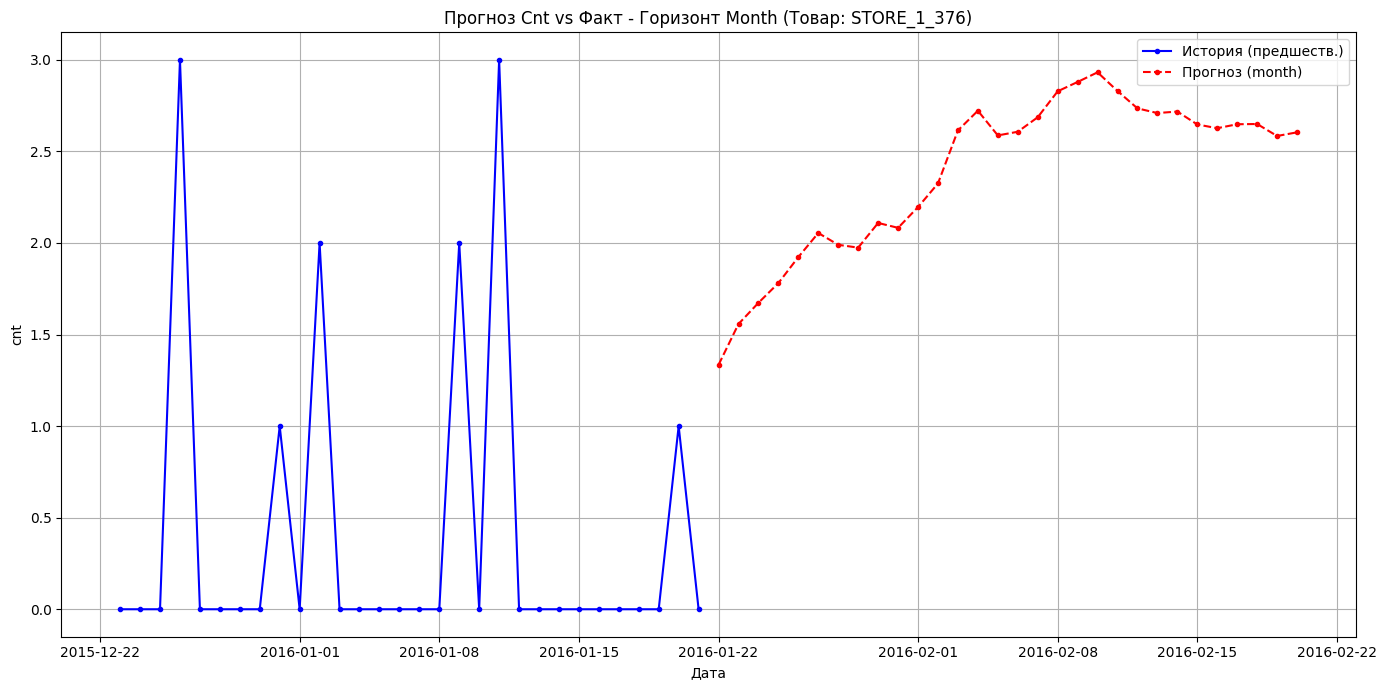

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_376 (старт: 2016-01-22)...


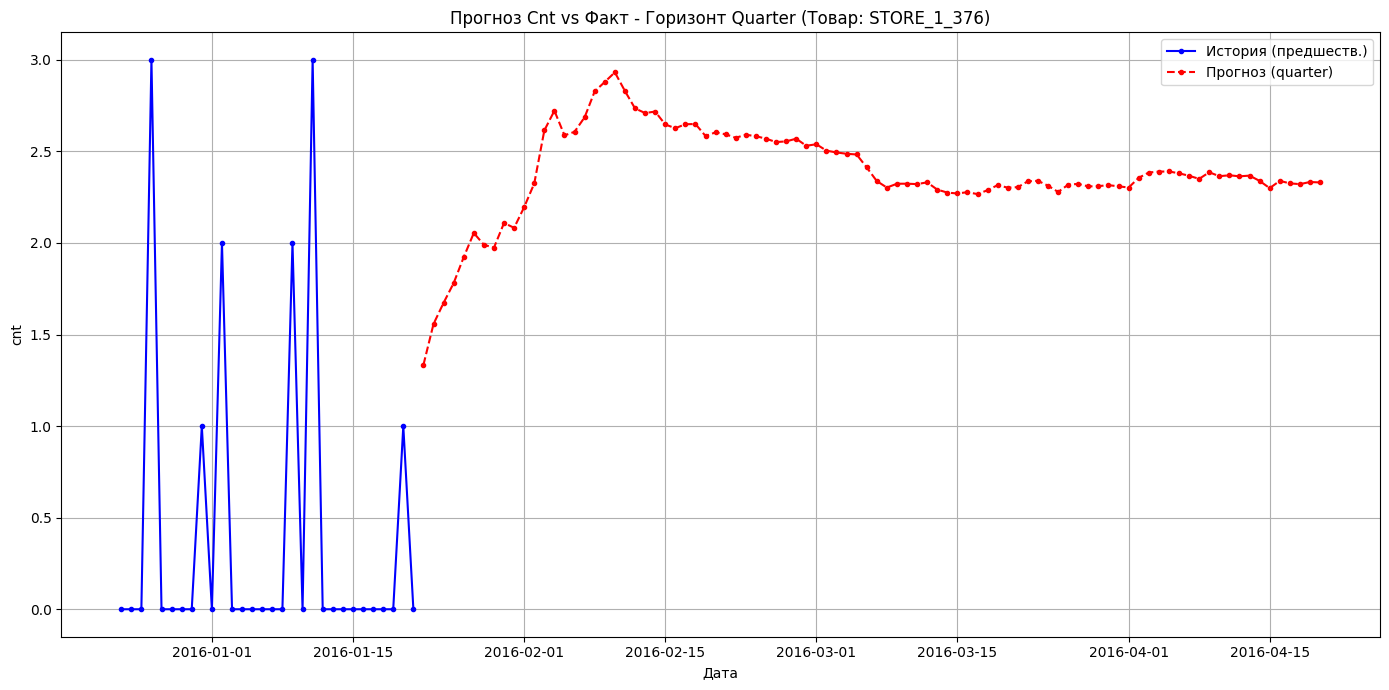


Оценка загруженной модели товара STORE_1_376 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_376_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_376_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_376_cnt_quarter.

>>> Товар: STORE_1_090 (5/15) <<<

--- Обработка  товара STORE_1_090 ---
Модель успешно загружена: models\catboost_STORE_1_090_cnt_model.cbm
Использование предобученной модели для товара STORE_1_090.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_090 (старт: 2016-01-22)...


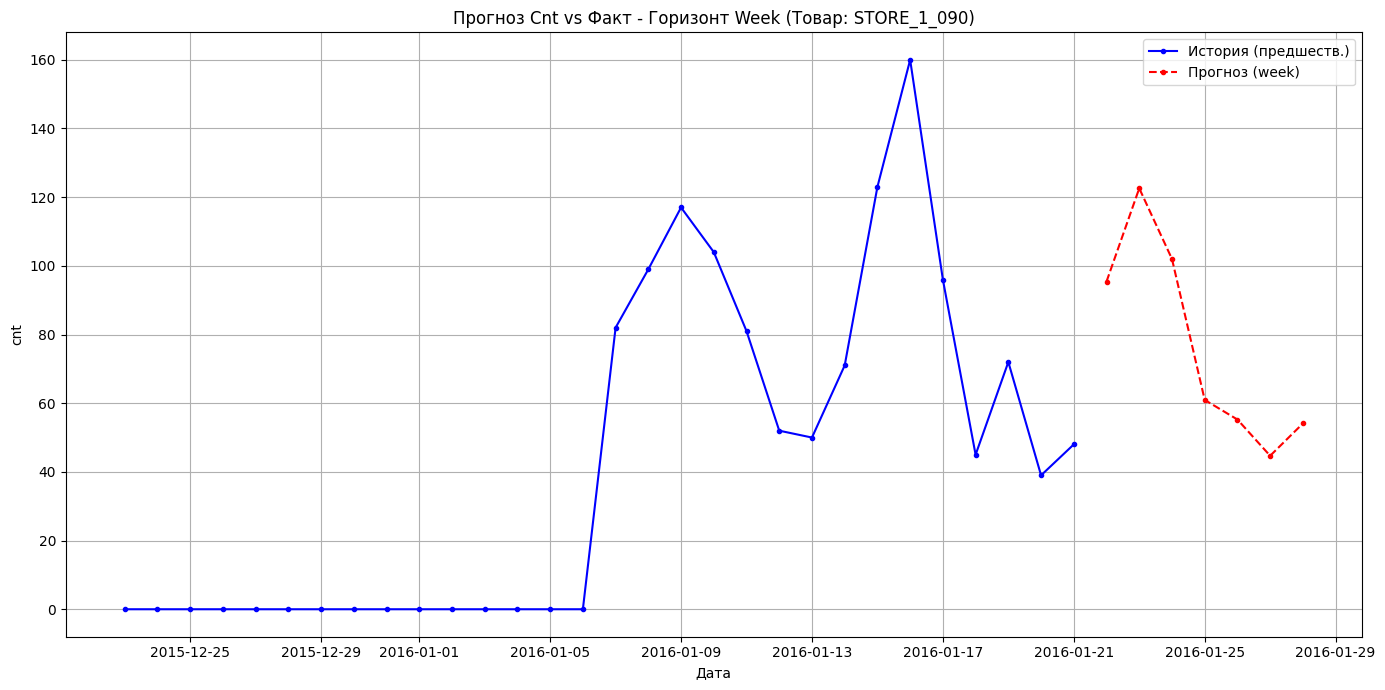

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_090 (старт: 2016-01-22)...


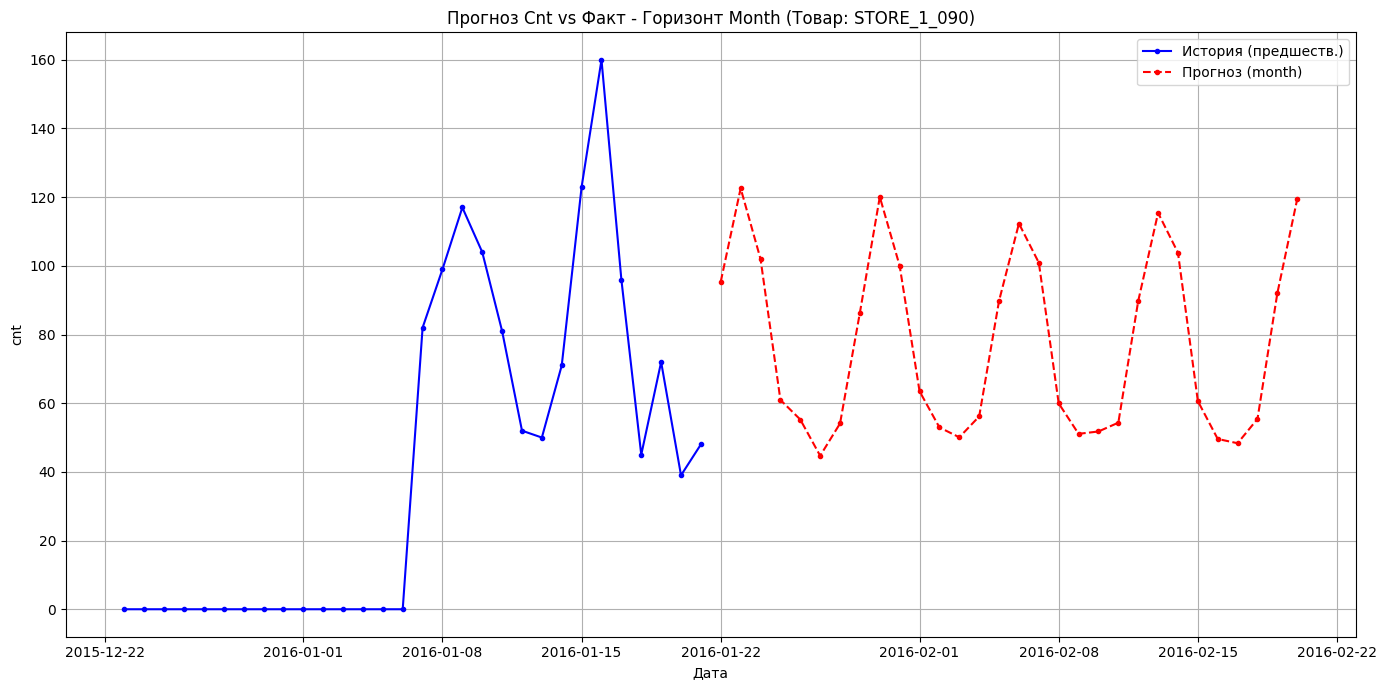

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_090 (старт: 2016-01-22)...


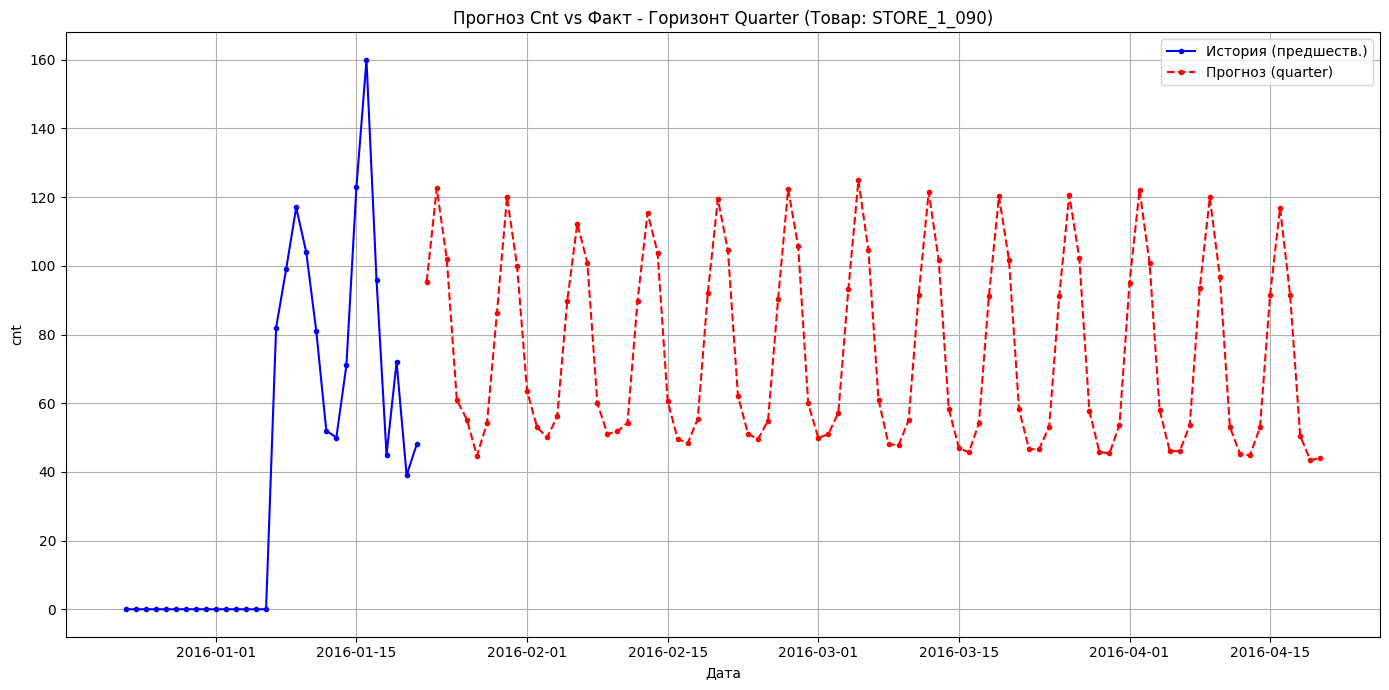


Оценка загруженной модели товара STORE_1_090 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_090_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_090_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_090_cnt_quarter.

>>> Товар: STORE_1_252 (6/15) <<<

--- Обработка  товара STORE_1_252 ---
Модель успешно загружена: models\catboost_STORE_1_252_cnt_model.cbm
Использование предобученной модели для товара STORE_1_252.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_252 (старт: 2016-01-22)...


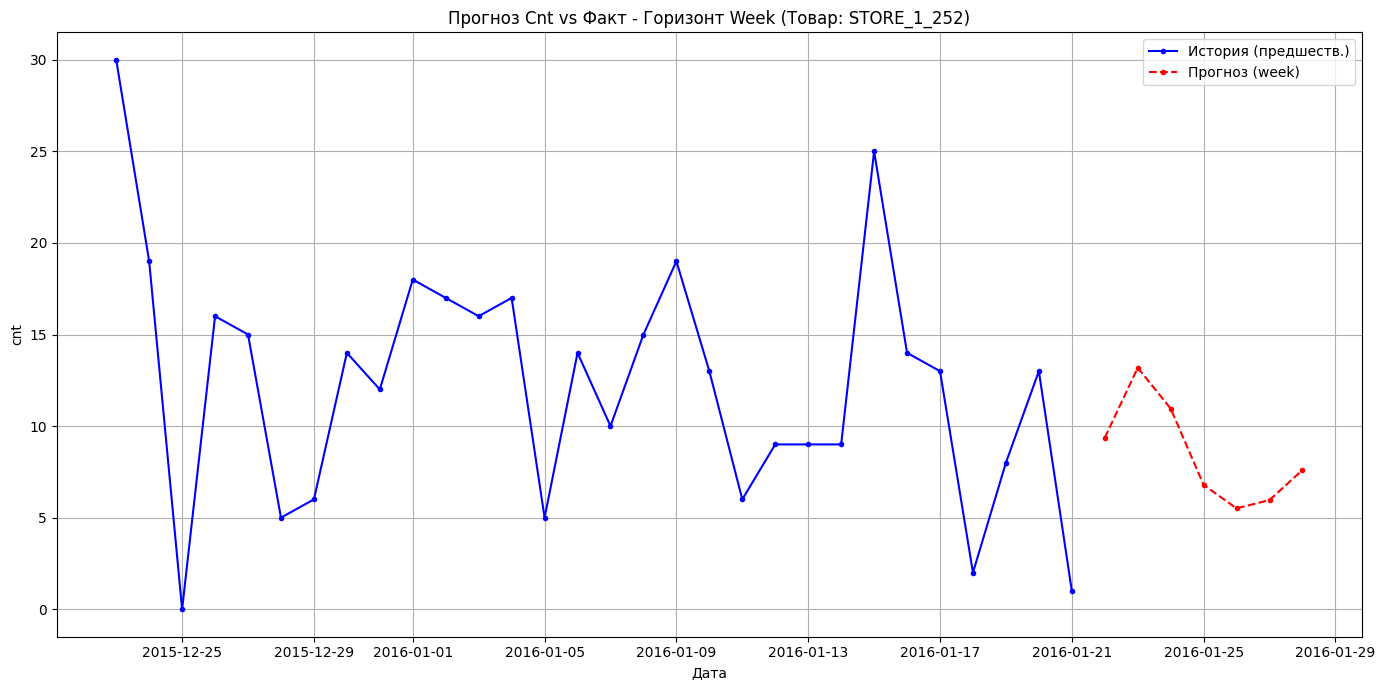

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_252 (старт: 2016-01-22)...


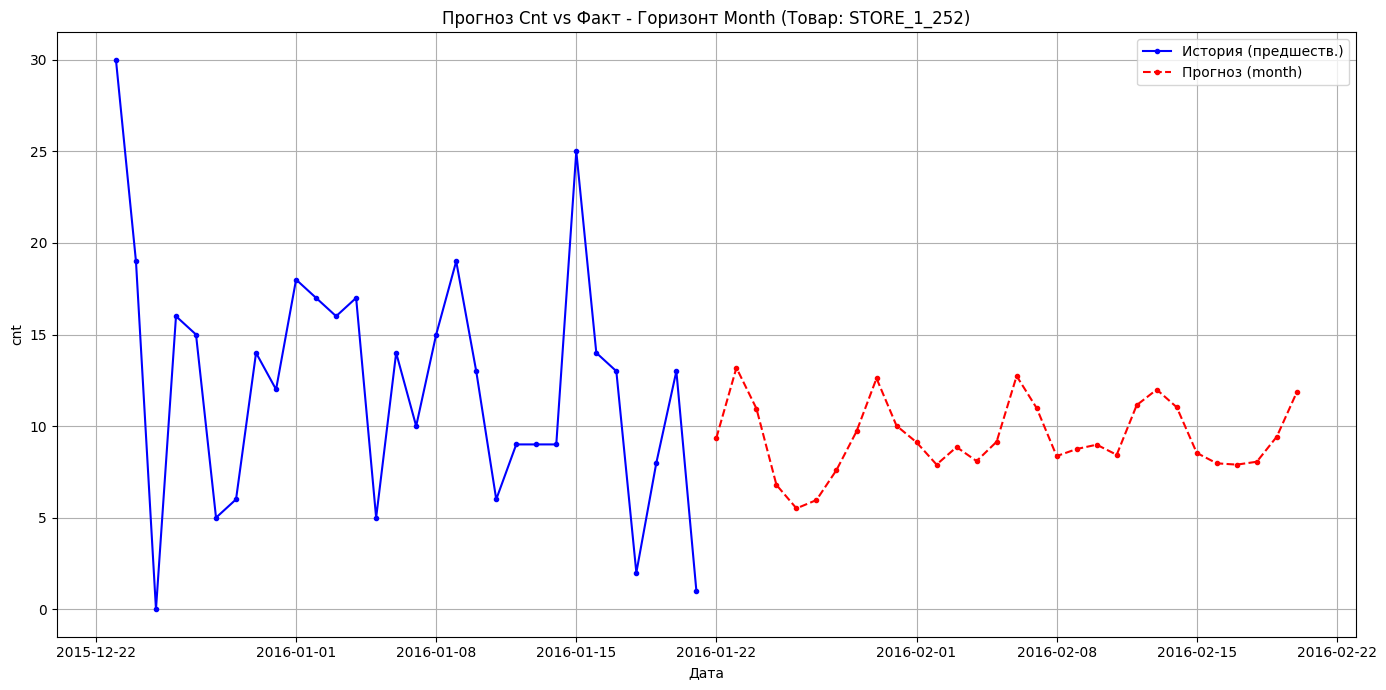

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_252 (старт: 2016-01-22)...


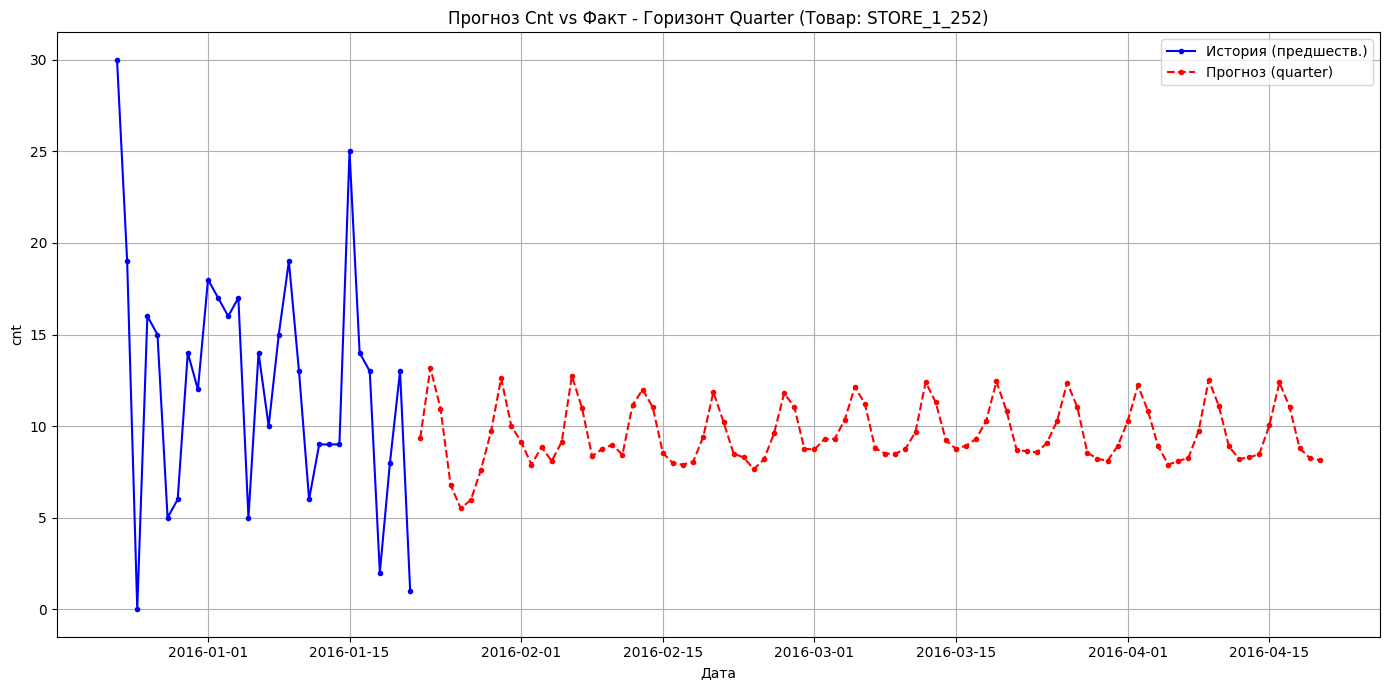


Оценка загруженной модели товара STORE_1_252 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_252_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_252_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_252_cnt_quarter.

>>> Товар: STORE_1_339 (7/15) <<<

--- Обработка  товара STORE_1_339 ---
Модель успешно загружена: models\catboost_STORE_1_339_cnt_model.cbm
Использование предобученной модели для товара STORE_1_339.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_339 (старт: 2016-01-22)...


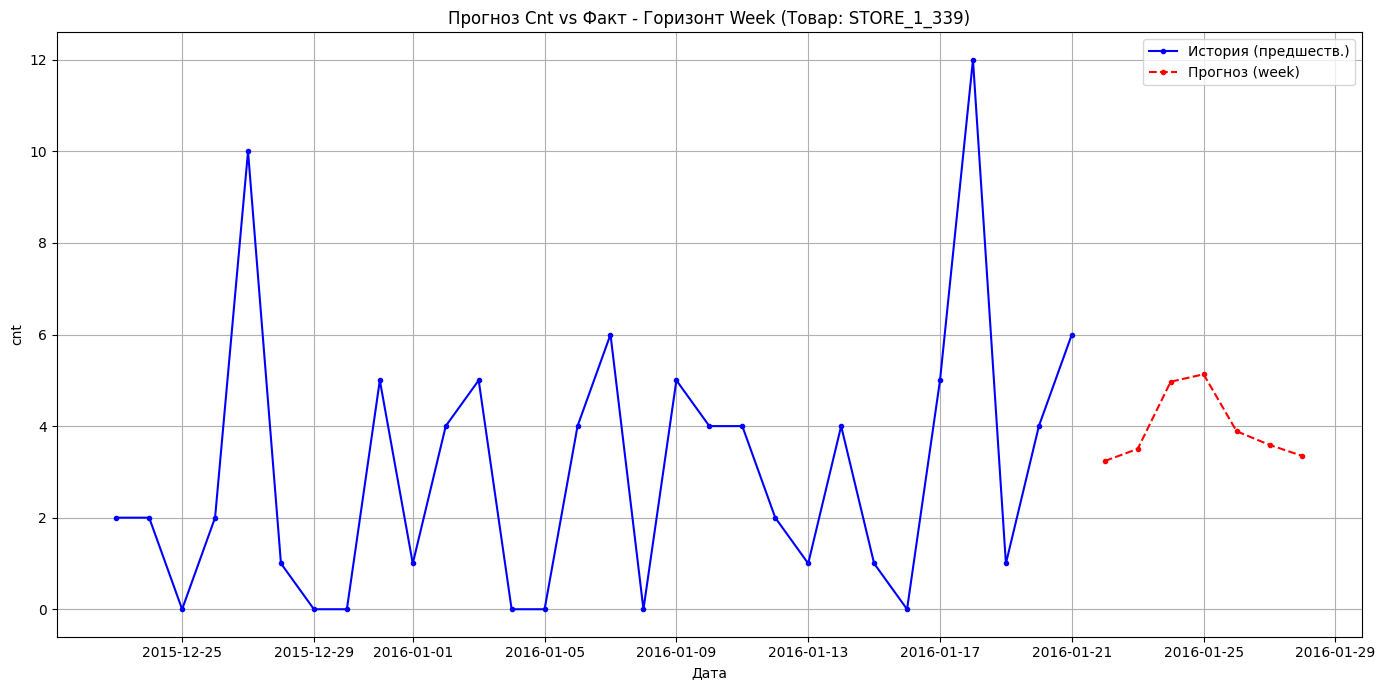

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_339 (старт: 2016-01-22)...


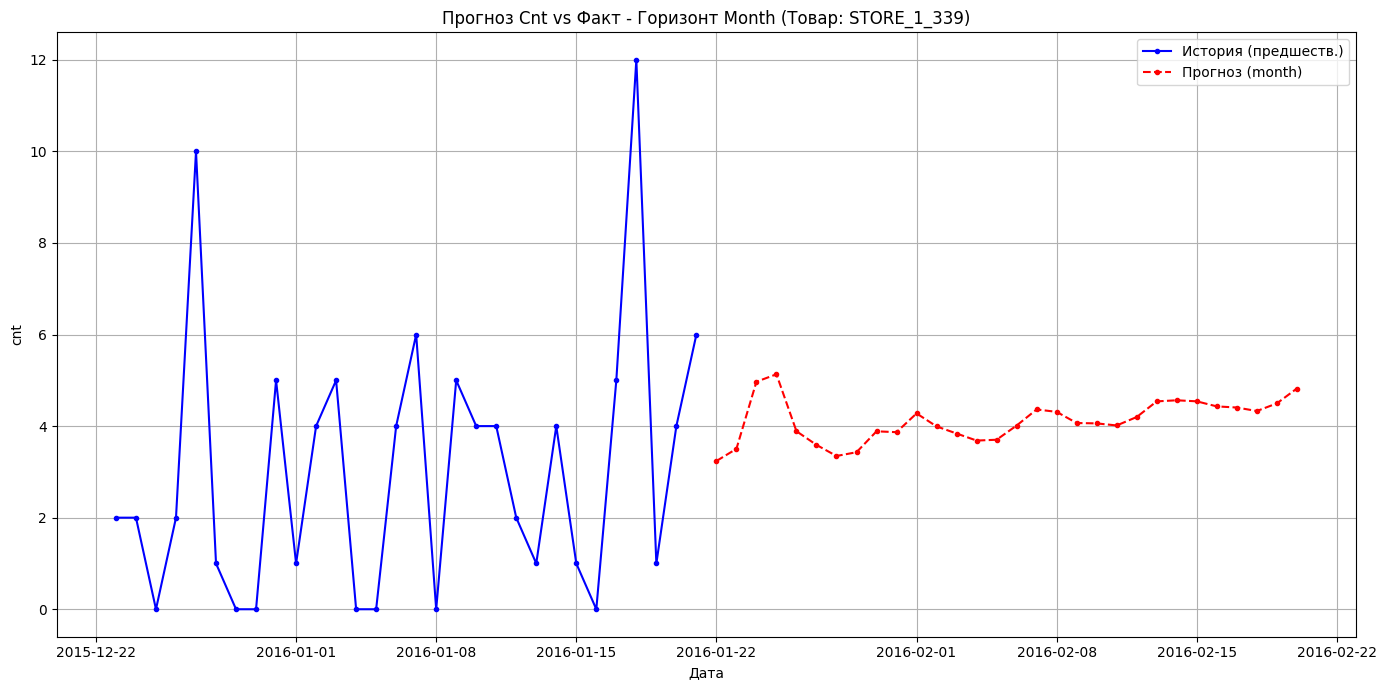

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_339 (старт: 2016-01-22)...


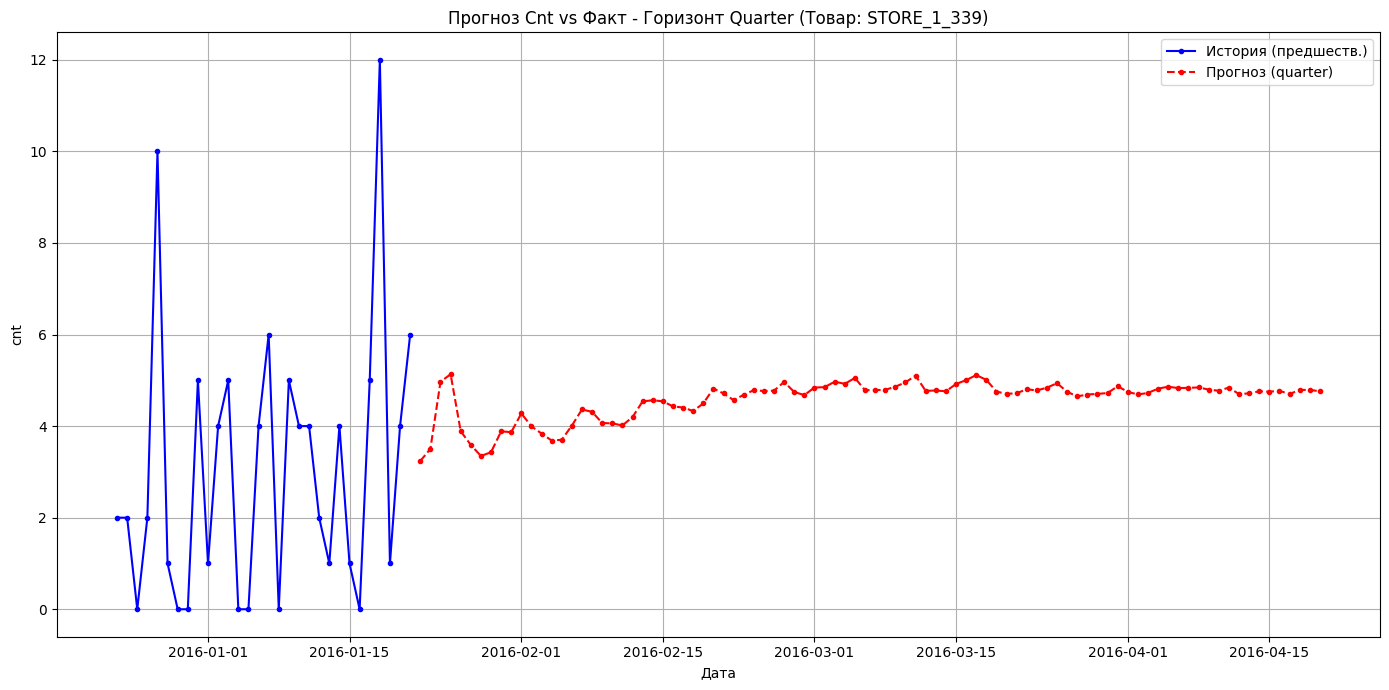


Оценка загруженной модели товара STORE_1_339 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_339_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_339_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_339_cnt_quarter.

>>> Товар: STORE_1_546 (8/15) <<<

--- Обработка  товара STORE_1_546 ---
Модель успешно загружена: models\catboost_STORE_1_546_cnt_model.cbm
Использование предобученной модели для товара STORE_1_546.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_546 (старт: 2016-01-22)...


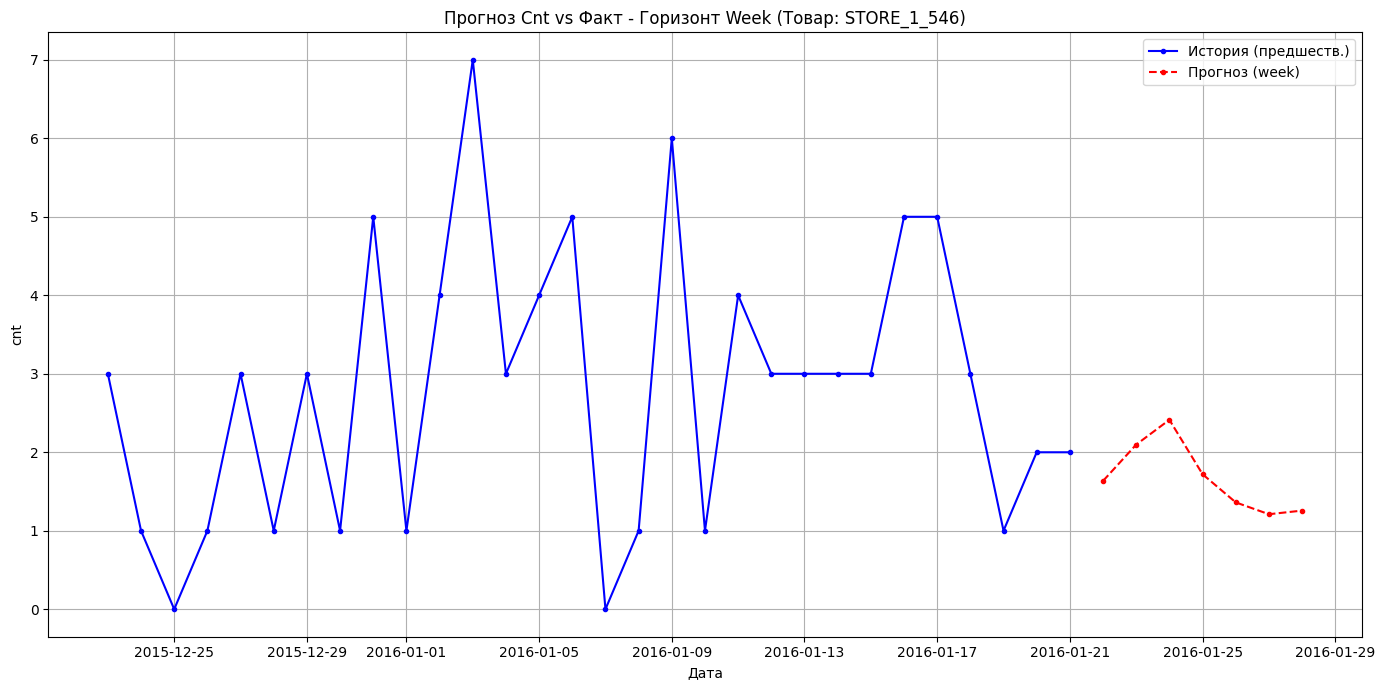

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_546 (старт: 2016-01-22)...


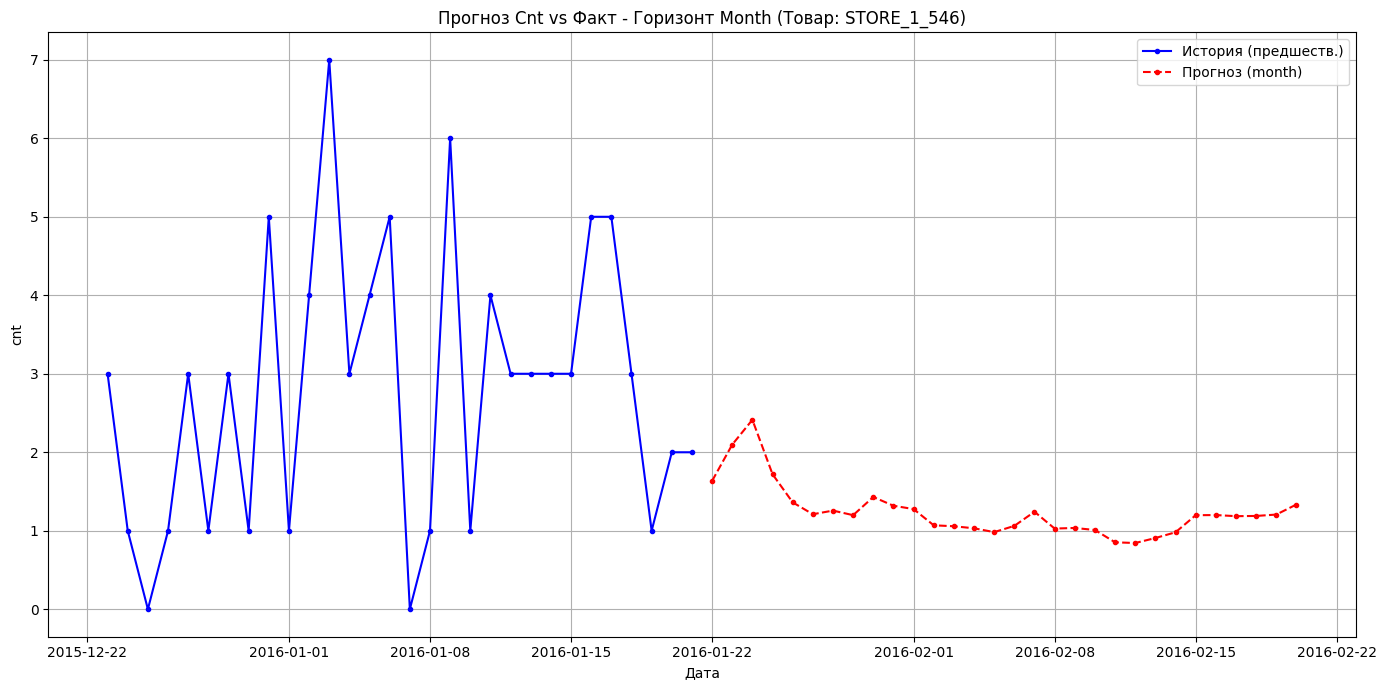

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_546 (старт: 2016-01-22)...


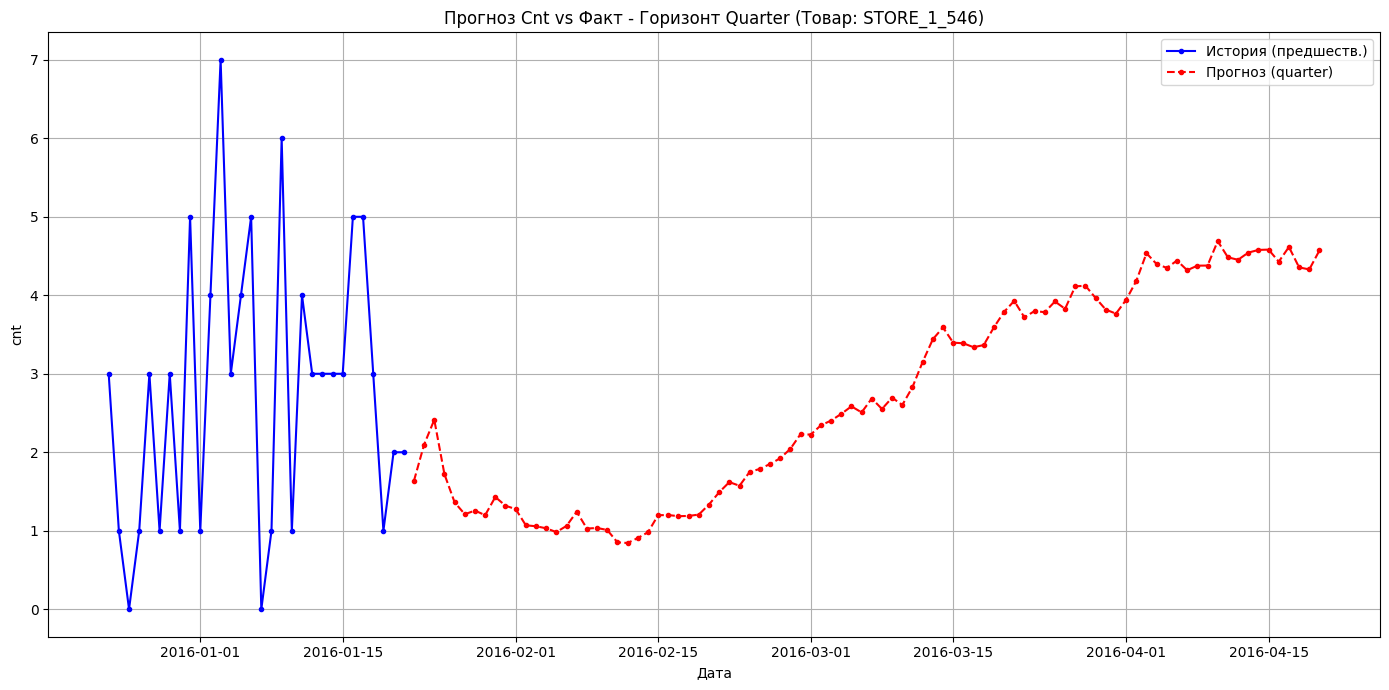


Оценка загруженной модели товара STORE_1_546 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_546_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_546_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_546_cnt_quarter.

>>> Товар: STORE_1_547 (9/15) <<<

--- Обработка  товара STORE_1_547 ---
Модель успешно загружена: models\catboost_STORE_1_547_cnt_model.cbm
Использование предобученной модели для товара STORE_1_547.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_547 (старт: 2016-01-22)...


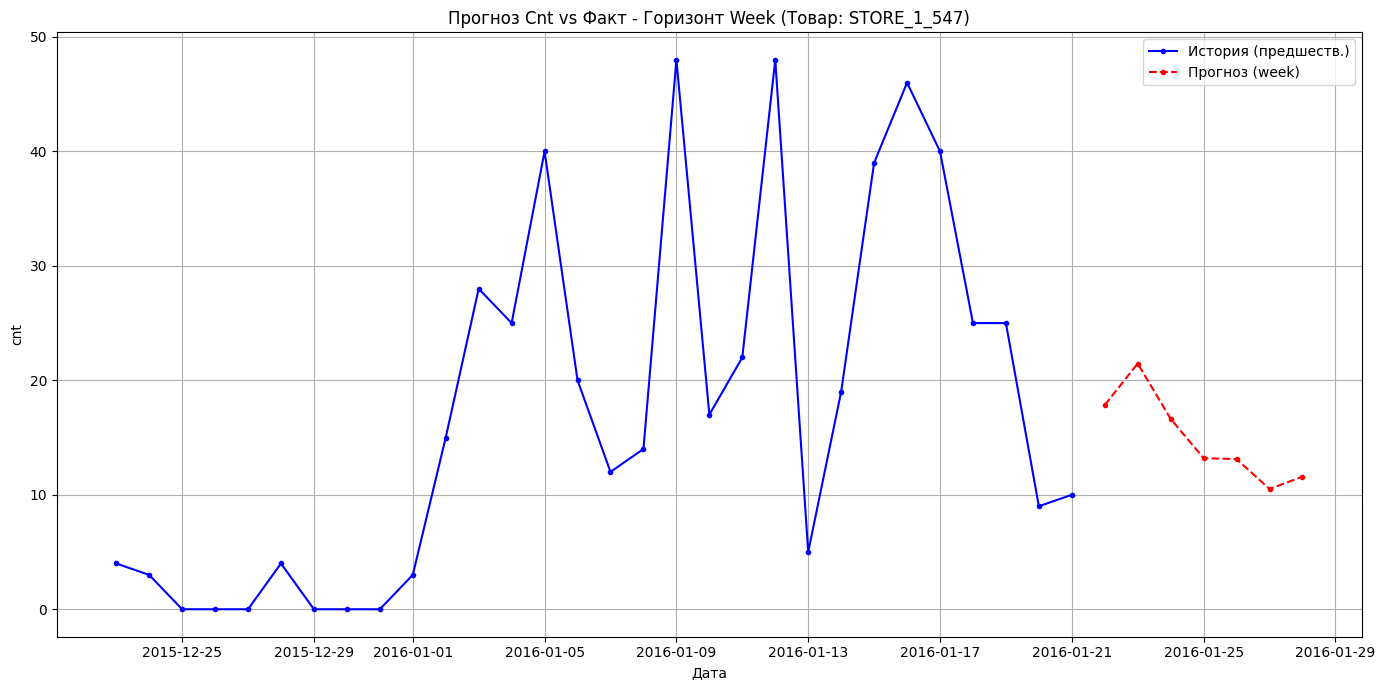

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_547 (старт: 2016-01-22)...


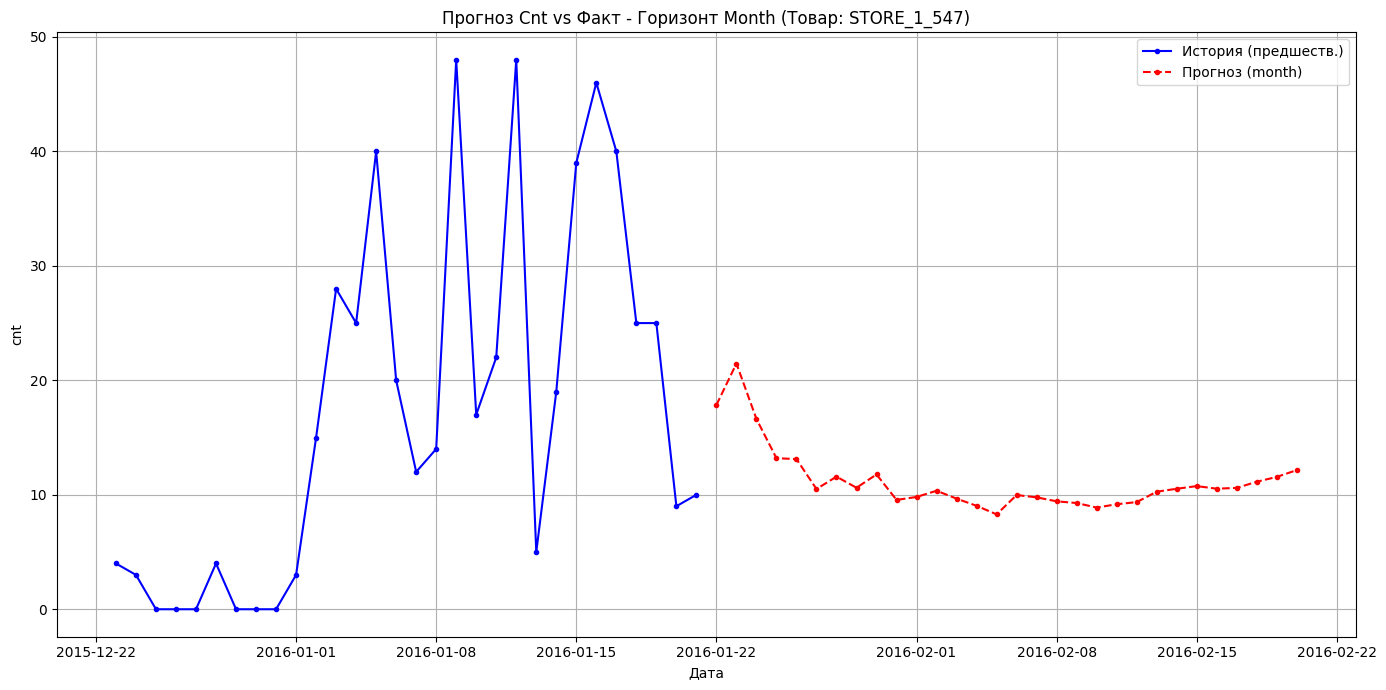

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_547 (старт: 2016-01-22)...


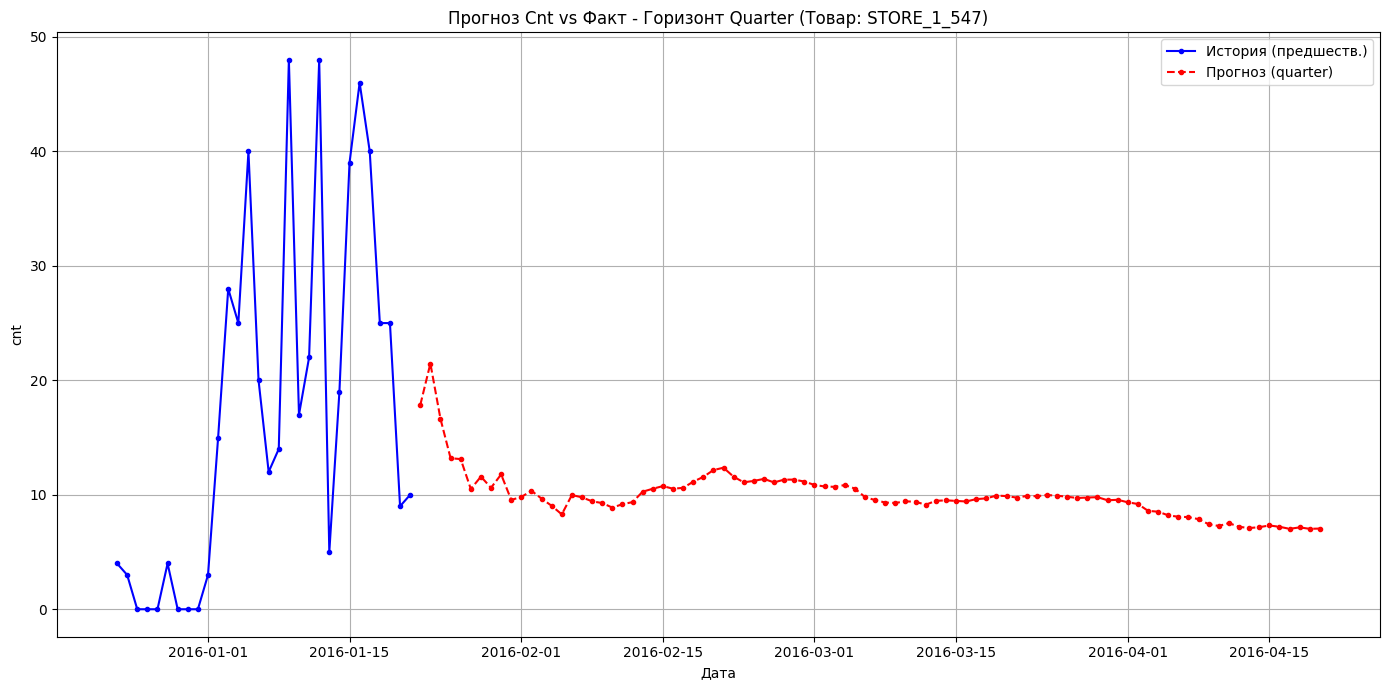


Оценка загруженной модели товара STORE_1_547 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_547_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_547_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_547_cnt_quarter.

>>> Товар: STORE_1_555 (10/15) <<<

--- Обработка  товара STORE_1_555 ---
Модель успешно загружена: models\catboost_STORE_1_555_cnt_model.cbm
Использование предобученной модели для товара STORE_1_555.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_555 (старт: 2016-01-22)...


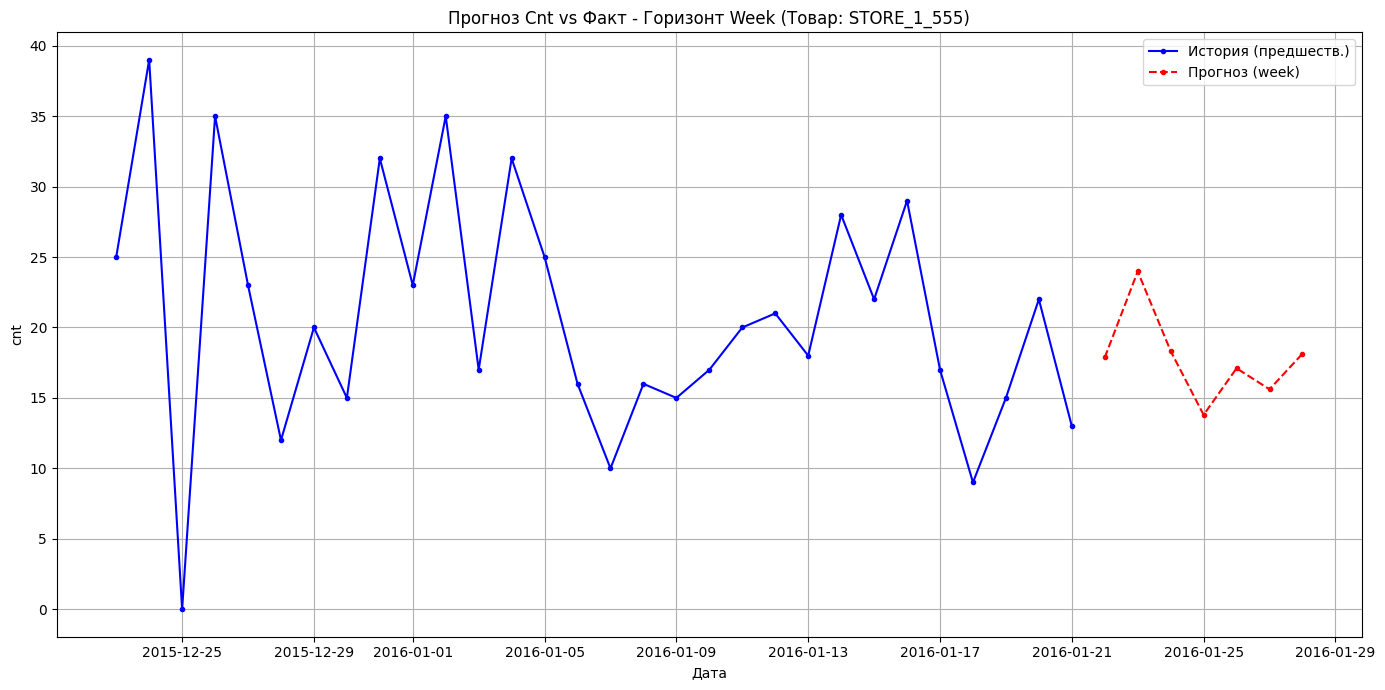

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_555 (старт: 2016-01-22)...


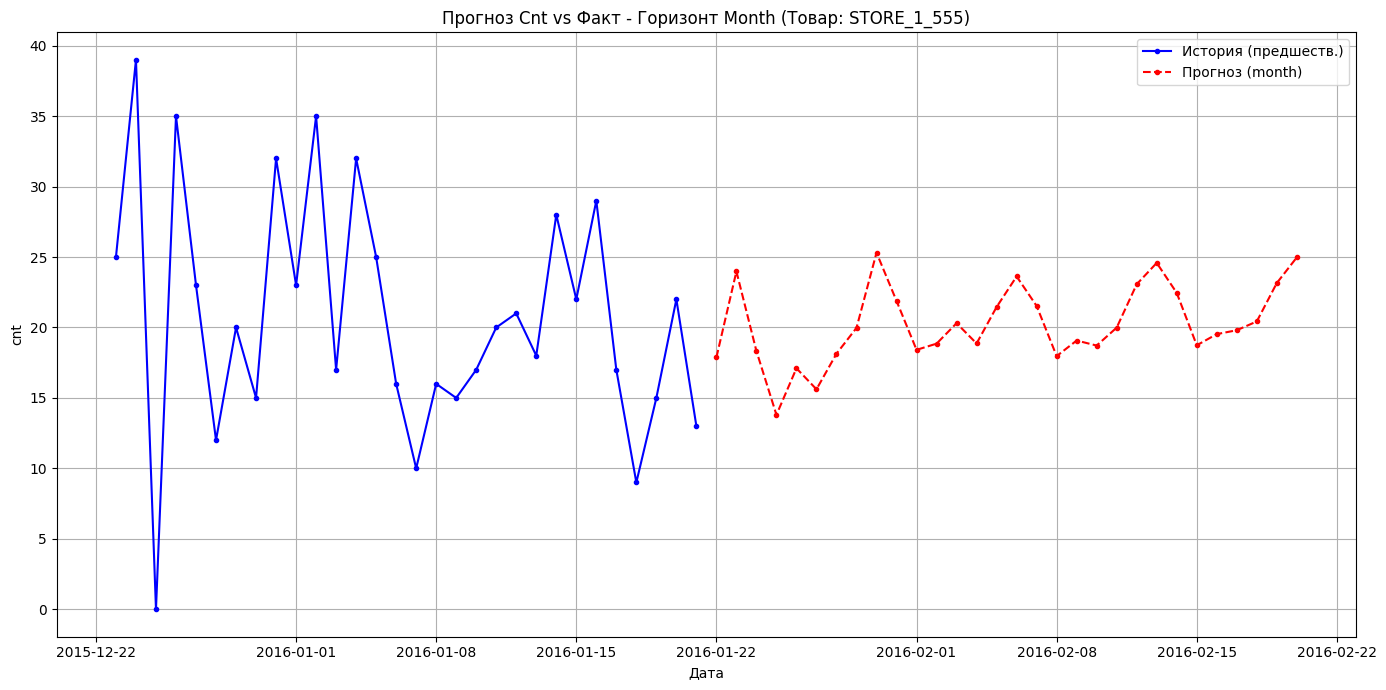

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_555 (старт: 2016-01-22)...


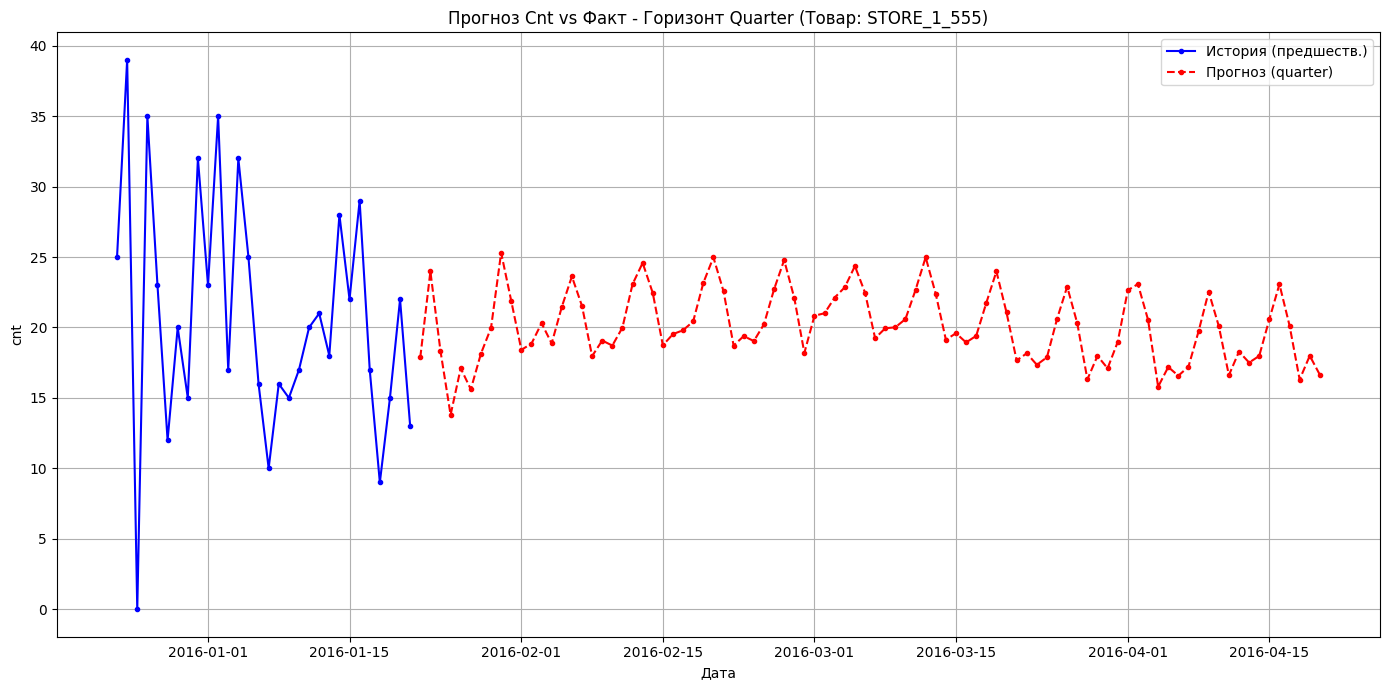


Оценка загруженной модели товара STORE_1_555 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_555_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_555_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_555_cnt_quarter.

>>> Товар: STORE_1_584 (11/15) <<<

--- Обработка  товара STORE_1_584 ---
Модель успешно загружена: models\catboost_STORE_1_584_cnt_model.cbm
Использование предобученной модели для товара STORE_1_584.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_584 (старт: 2016-01-22)...


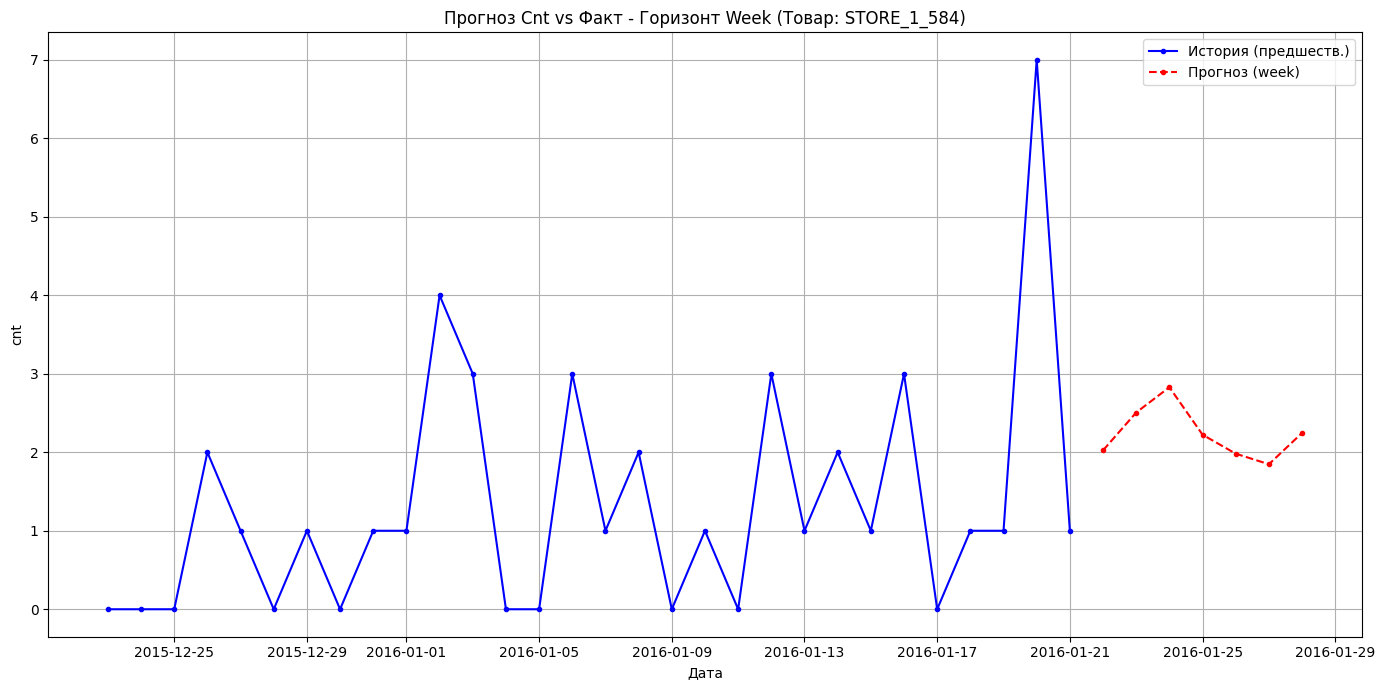

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_584 (старт: 2016-01-22)...


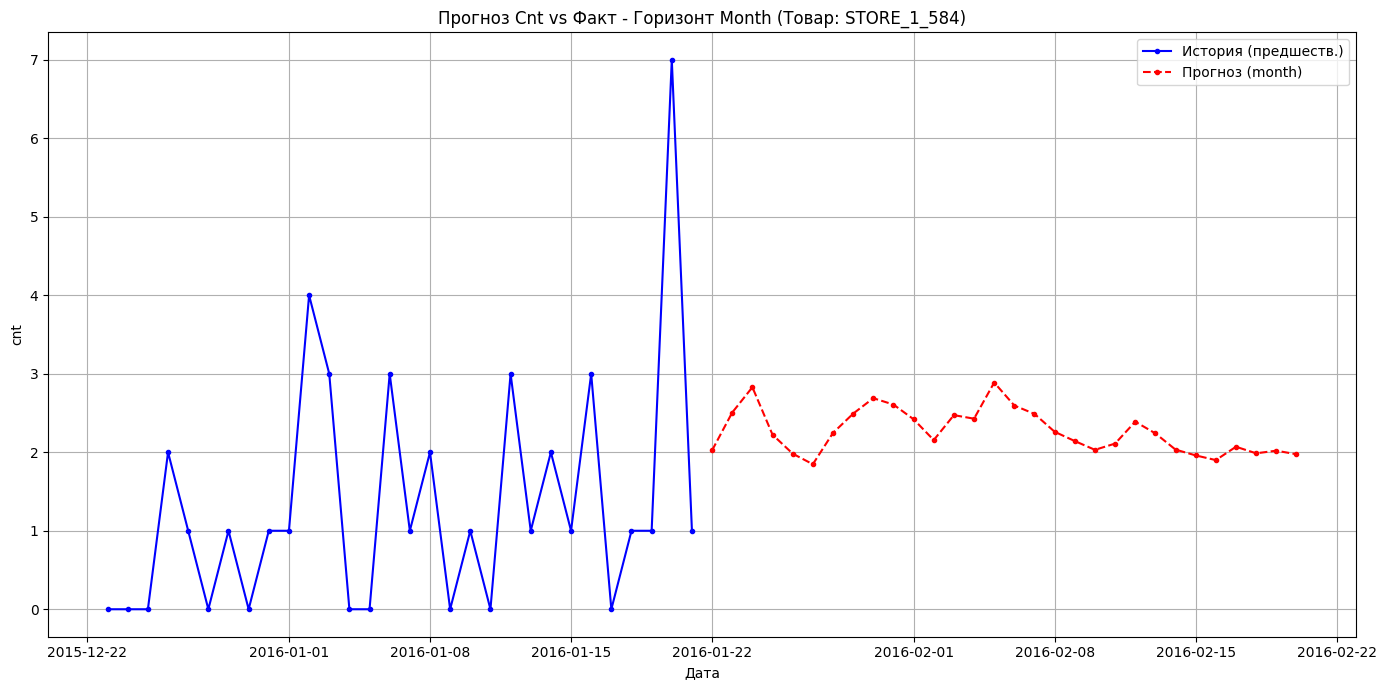

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_584 (старт: 2016-01-22)...


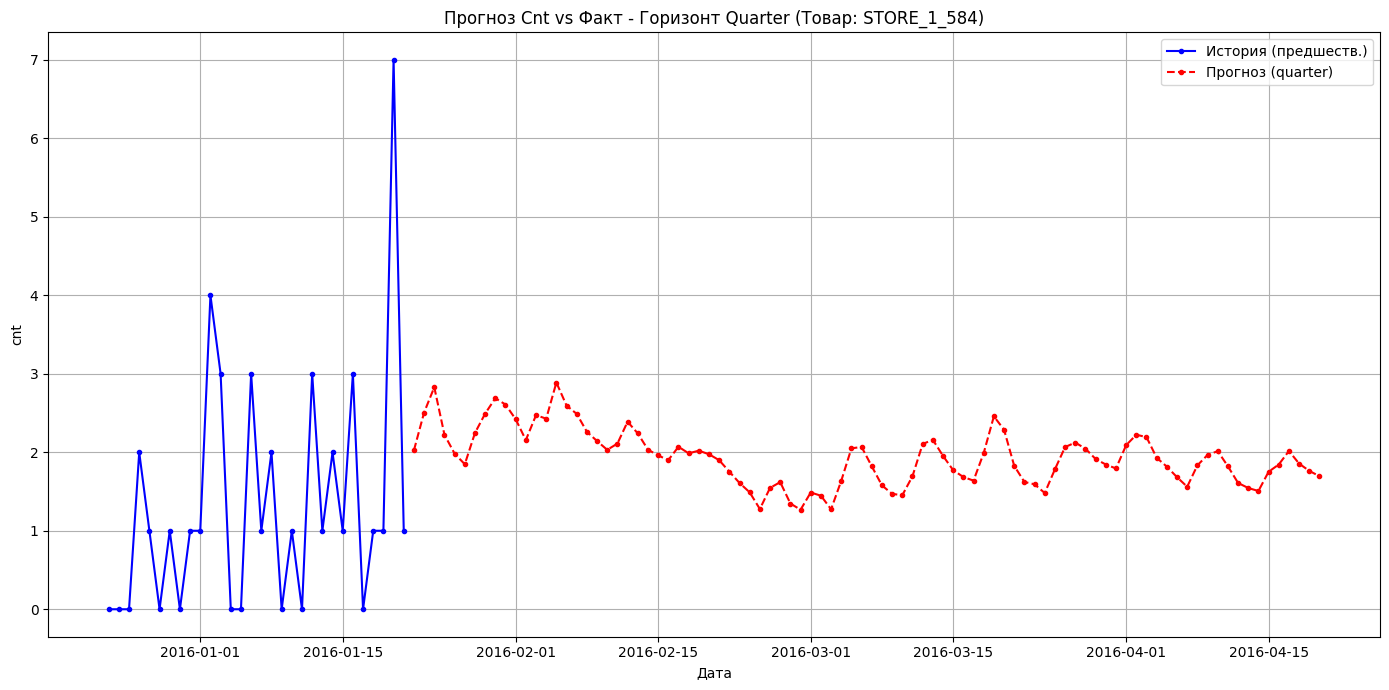


Оценка загруженной модели товара STORE_1_584 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_584_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_584_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_584_cnt_quarter.

>>> Товар: STORE_1_586 (12/15) <<<

--- Обработка  товара STORE_1_586 ---
Модель успешно загружена: models\catboost_STORE_1_586_cnt_model.cbm
Использование предобученной модели для товара STORE_1_586.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_586 (старт: 2016-01-22)...


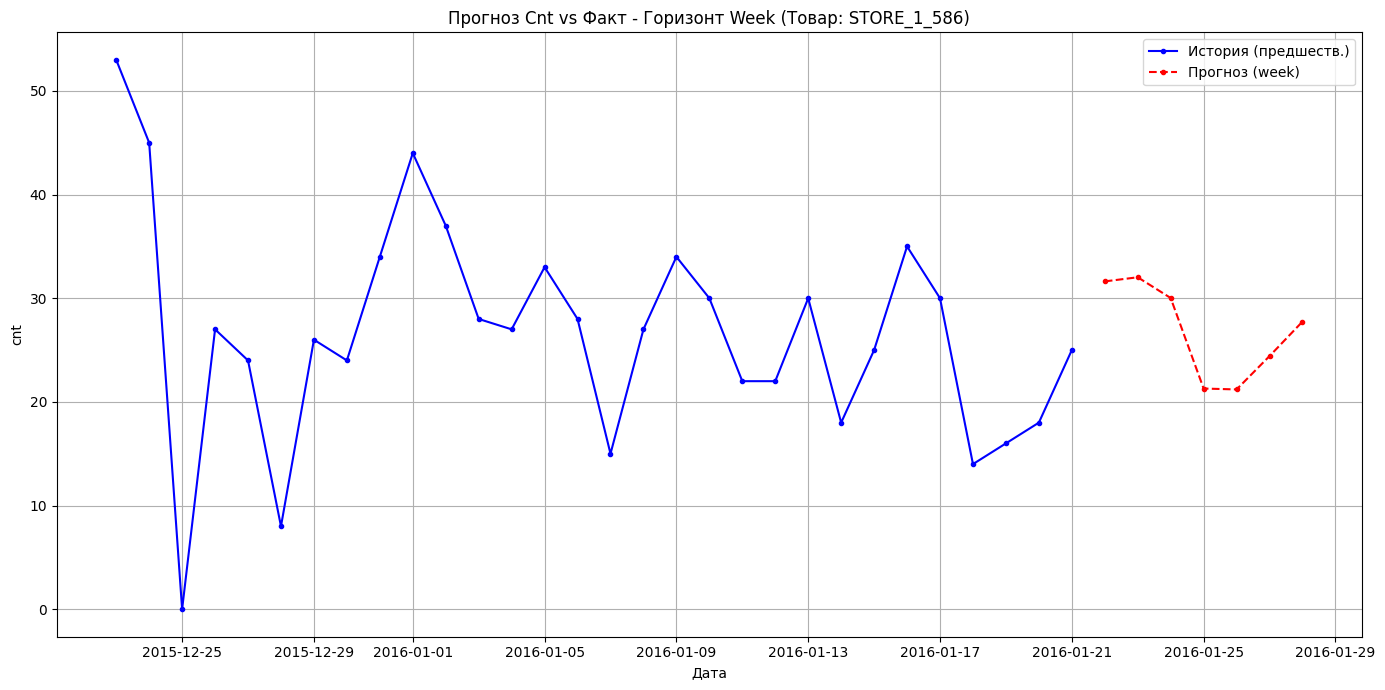

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_586 (старт: 2016-01-22)...


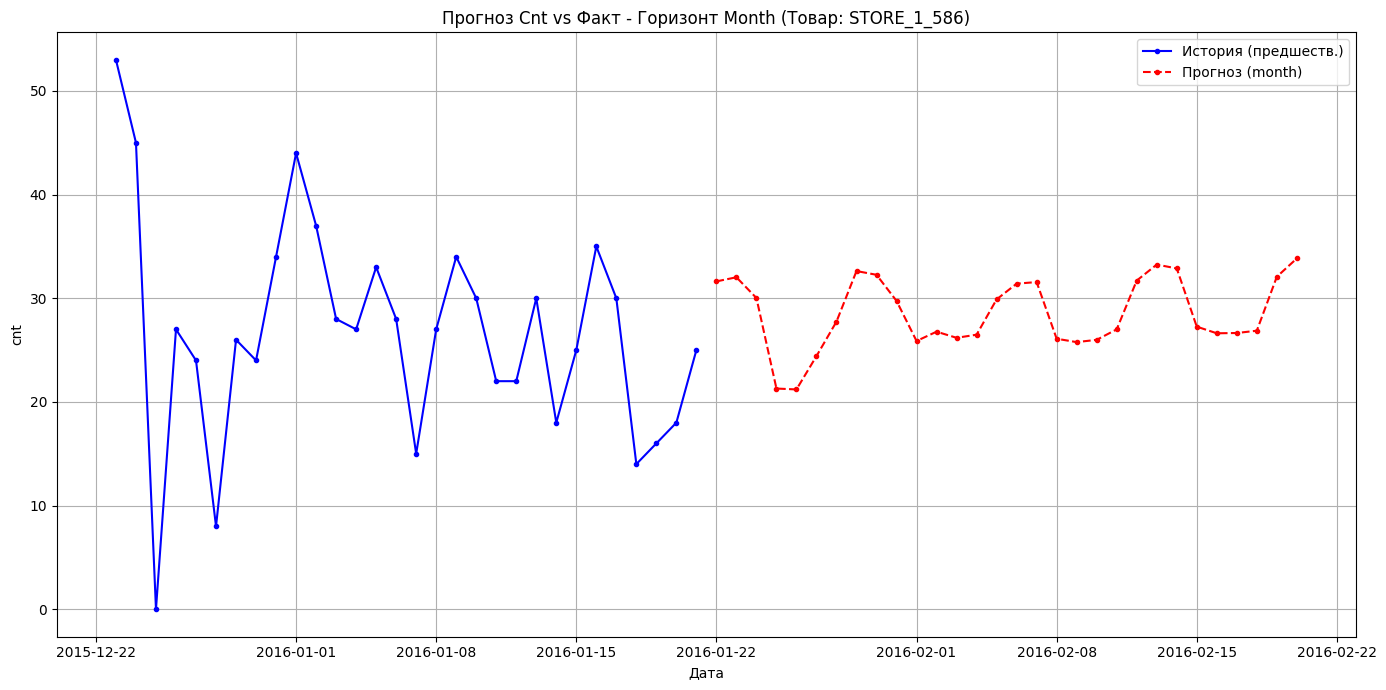

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_586 (старт: 2016-01-22)...


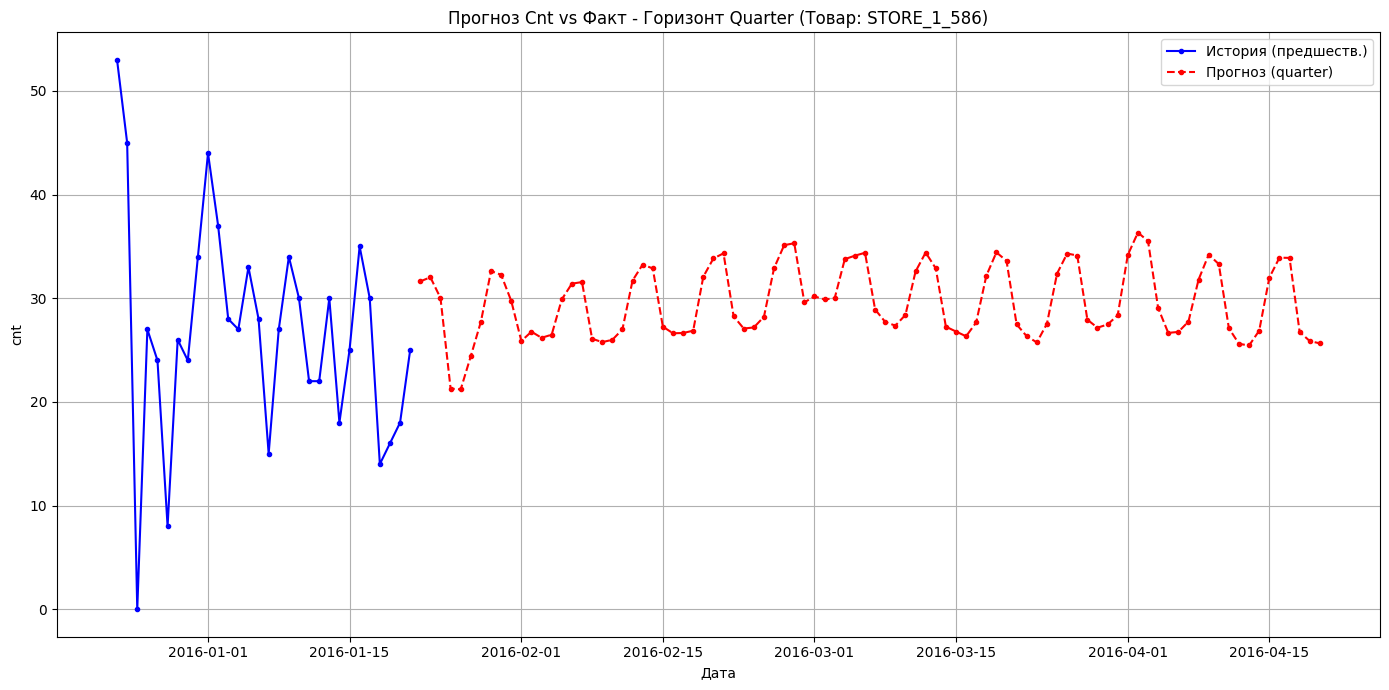


Оценка загруженной модели товара STORE_1_586 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_586_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_586_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_586_cnt_quarter.

>>> Товар: STORE_1_587 (13/15) <<<

--- Обработка  товара STORE_1_587 ---
Модель успешно загружена: models\catboost_STORE_1_587_cnt_model.cbm
Использование предобученной модели для товара STORE_1_587.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_587 (старт: 2016-01-22)...


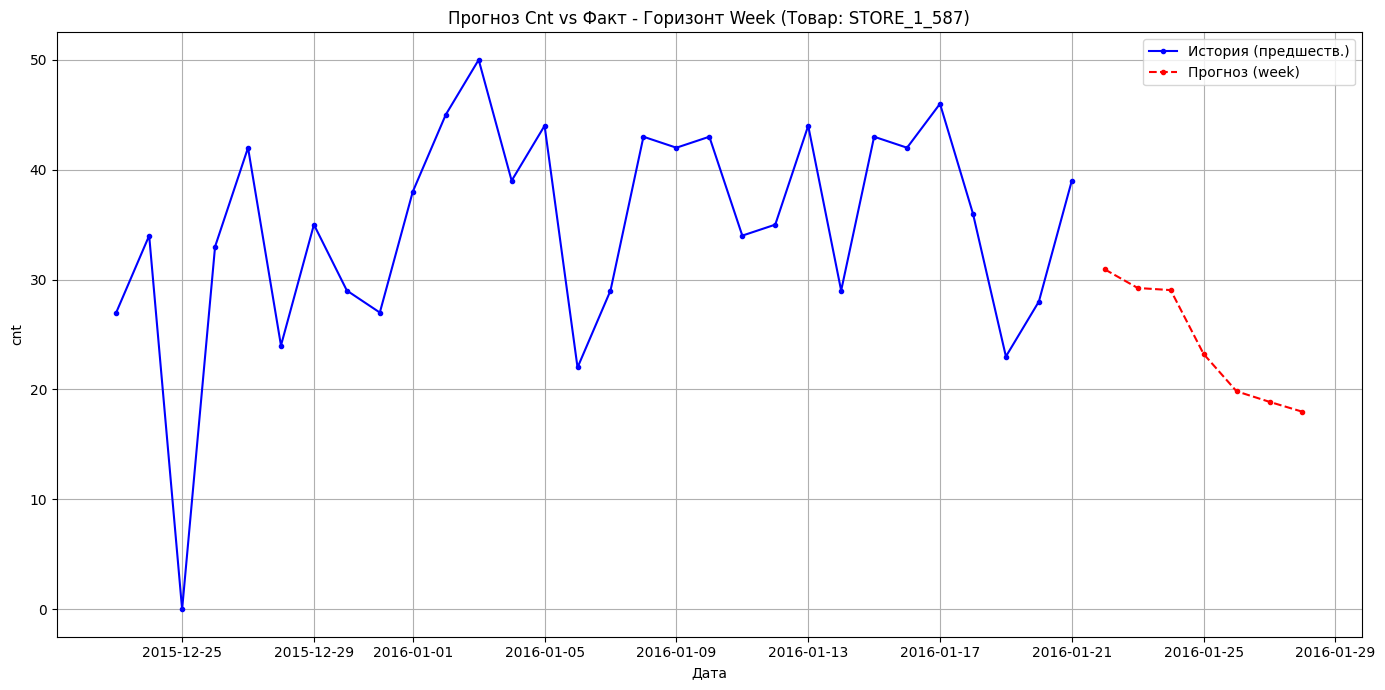

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_587 (старт: 2016-01-22)...


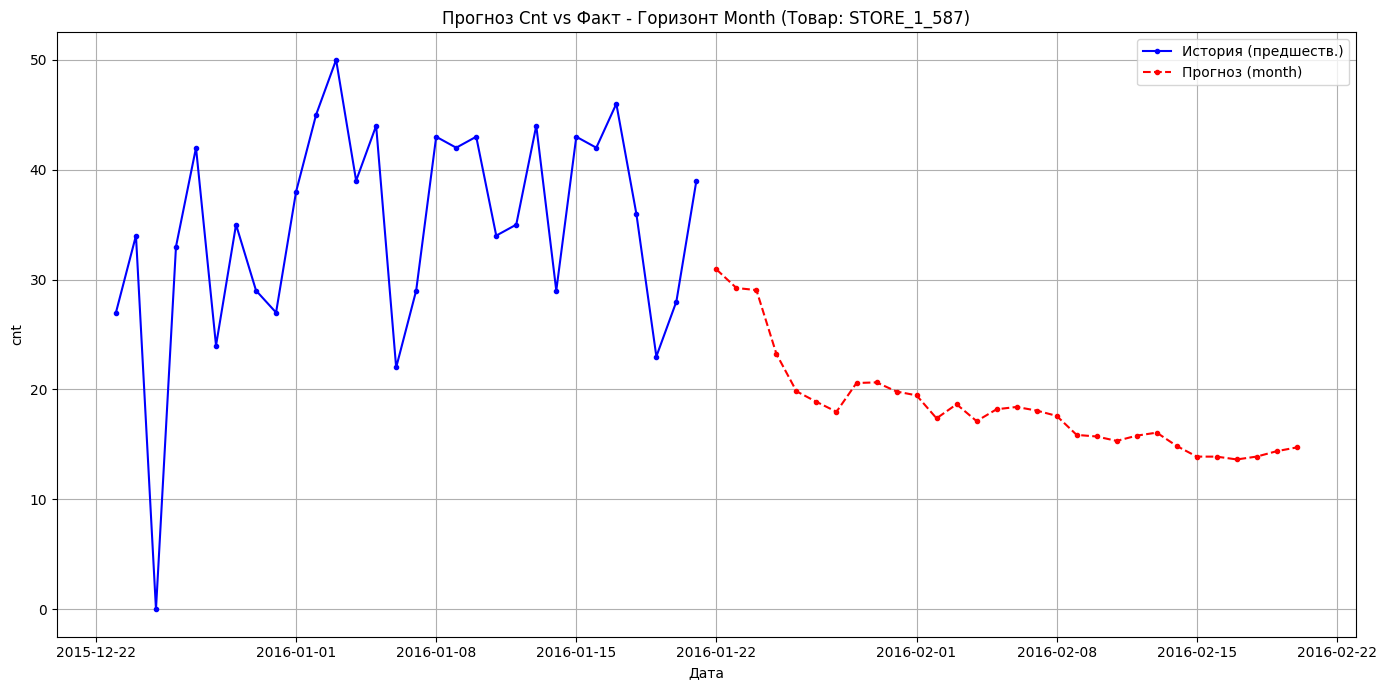

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_587 (старт: 2016-01-22)...


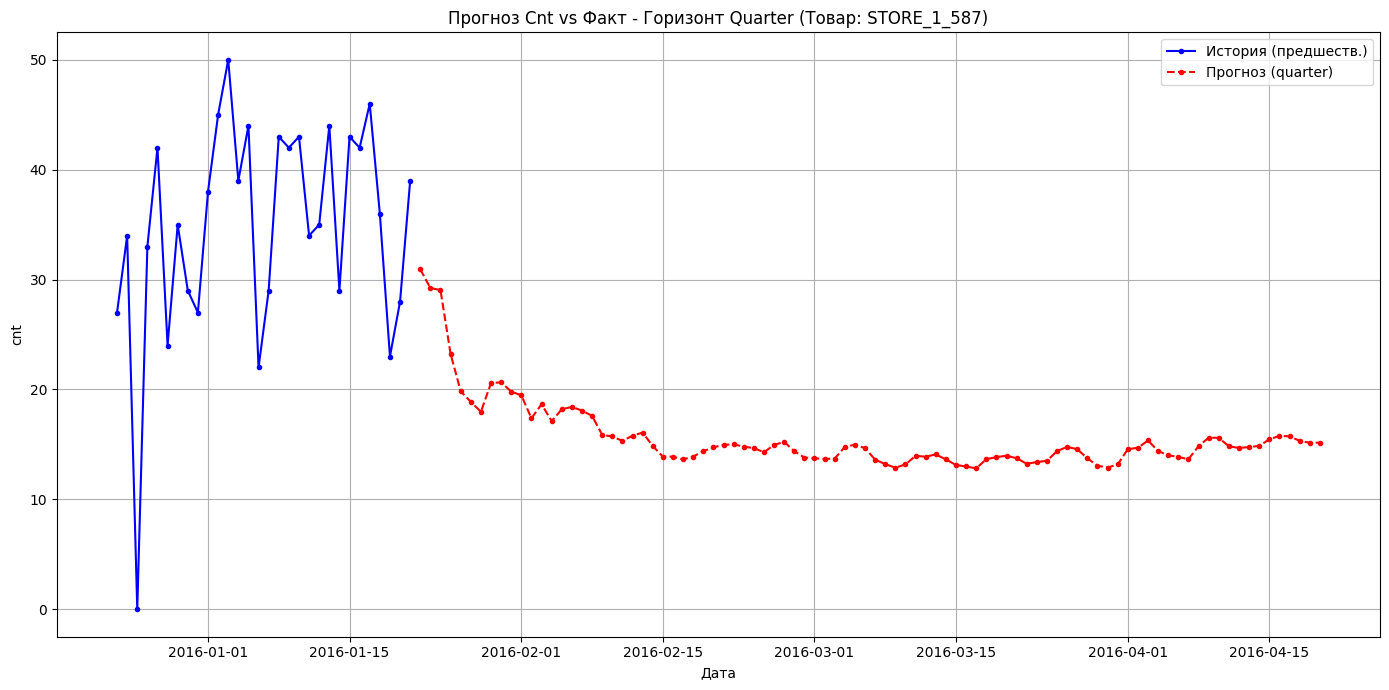


Оценка загруженной модели товара STORE_1_587 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_587_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_587_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_587_cnt_quarter.

>>> Товар: STORE_1_714 (14/15) <<<

--- Обработка  товара STORE_1_714 ---
Модель успешно загружена: models\catboost_STORE_1_714_cnt_model.cbm
Использование предобученной модели для товара STORE_1_714.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_714 (старт: 2016-01-22)...


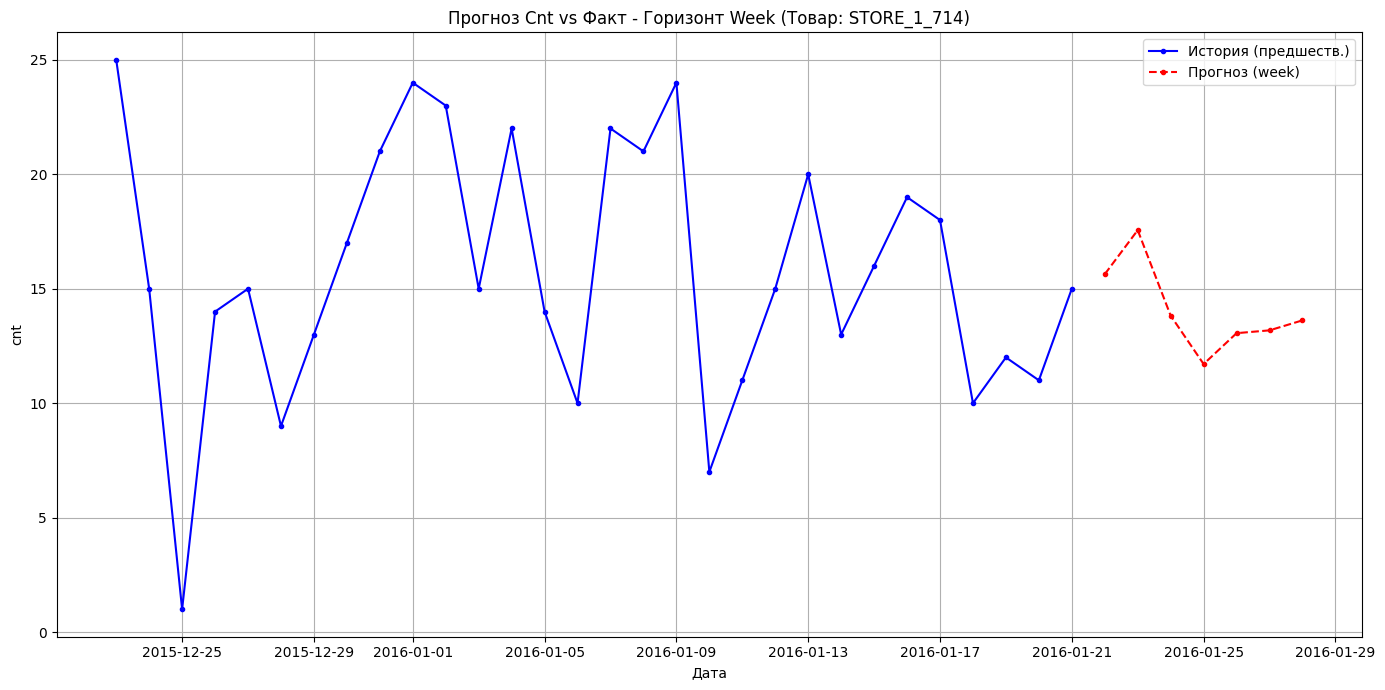

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_714 (старт: 2016-01-22)...


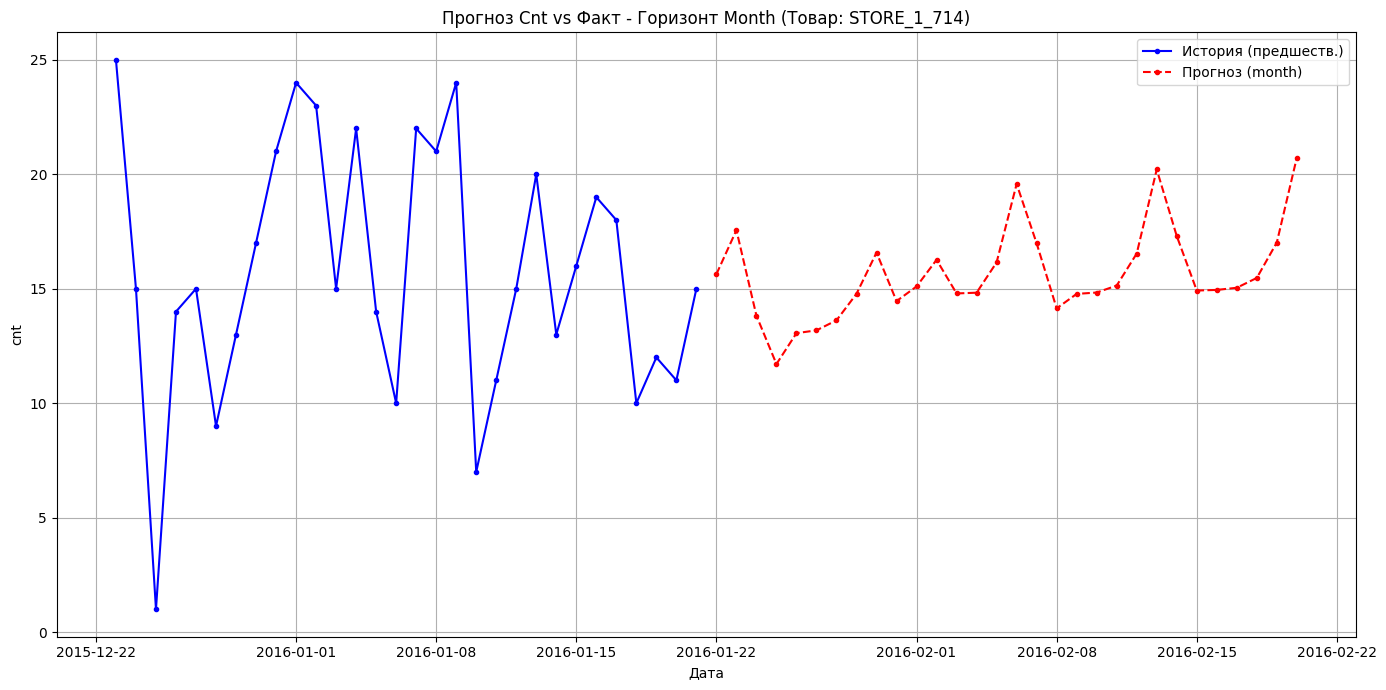

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_714 (старт: 2016-01-22)...


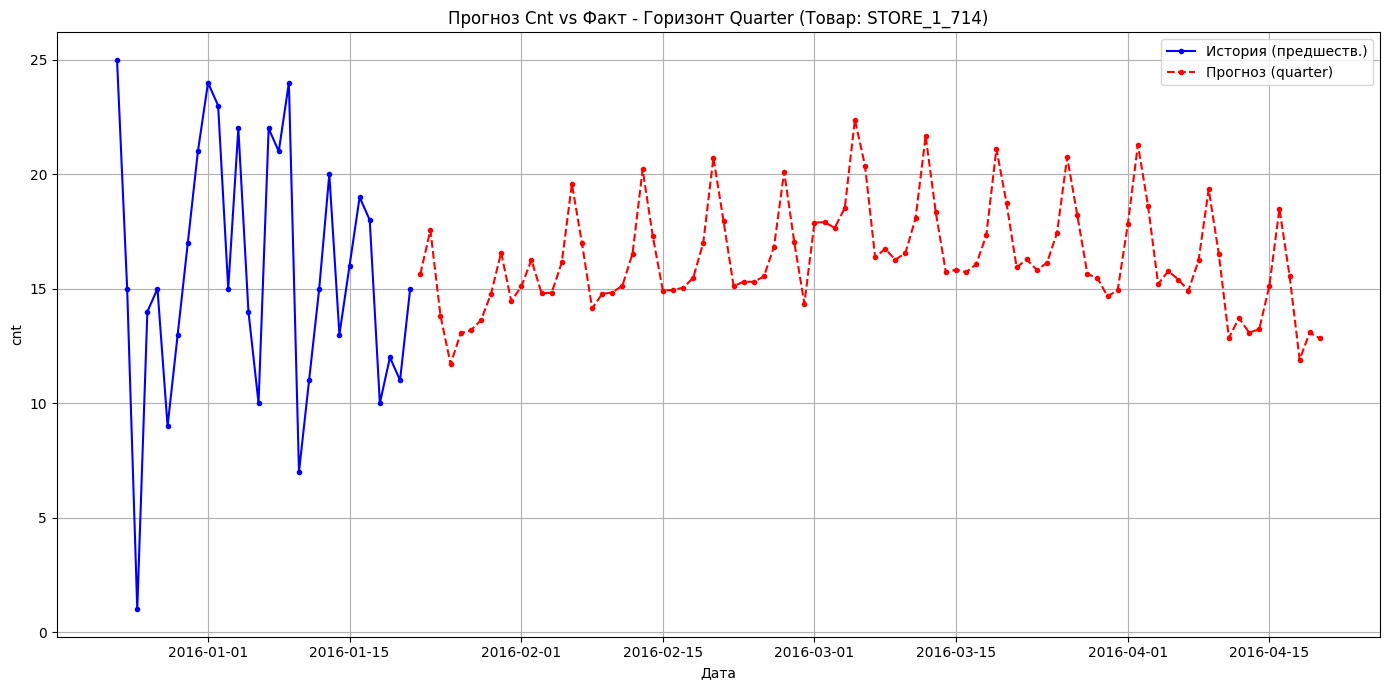


Оценка загруженной модели товара STORE_1_714 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_714_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_714_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_714_cnt_quarter.

>>> Товар: STORE_1_727 (15/15) <<<

--- Обработка  товара STORE_1_727 ---
Модель успешно загружена: models\catboost_STORE_1_727_cnt_model.cbm
Использование предобученной модели для товара STORE_1_727.
Определена точка старта прогноза: 2016-01-22
Генерация прогноза на week (7 дней) для cnt для товара STORE_1_727 (старт: 2016-01-22)...


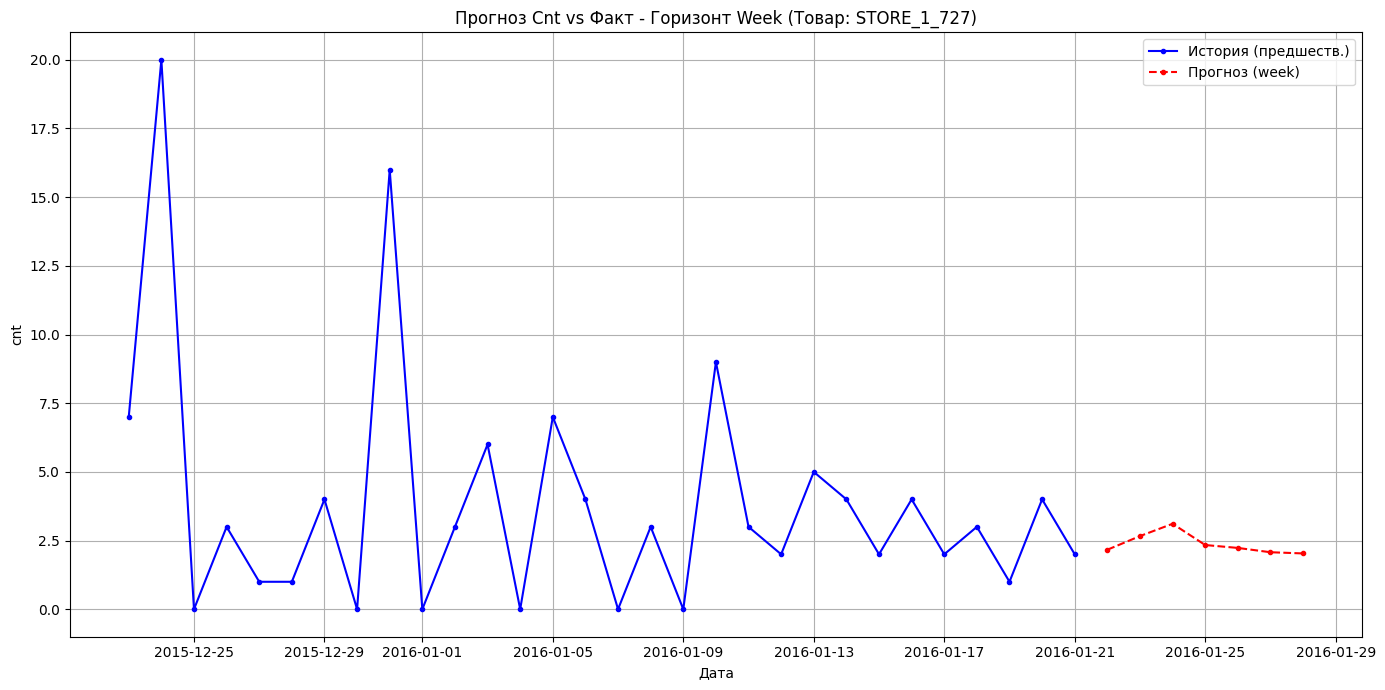

Генерация прогноза на month (30 дней) для cnt для товара STORE_1_727 (старт: 2016-01-22)...


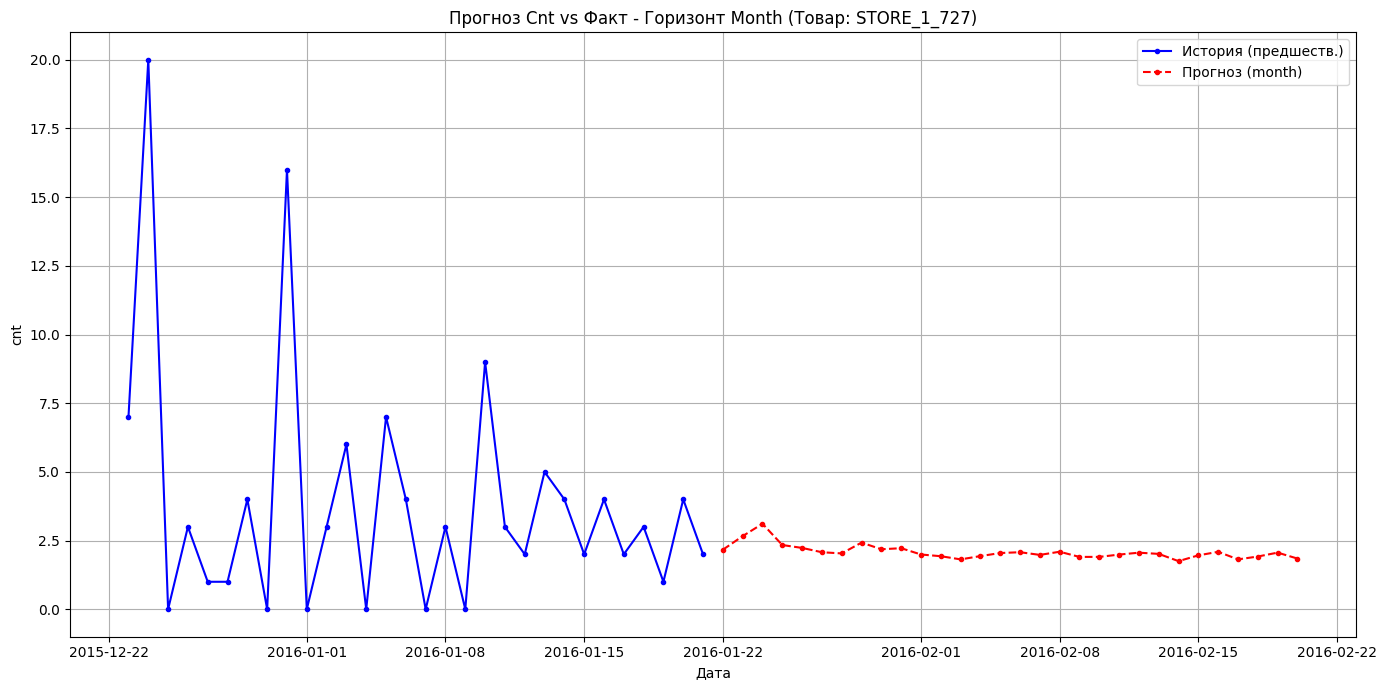

Генерация прогноза на quarter (90 дней) для cnt для товара STORE_1_727 (старт: 2016-01-22)...


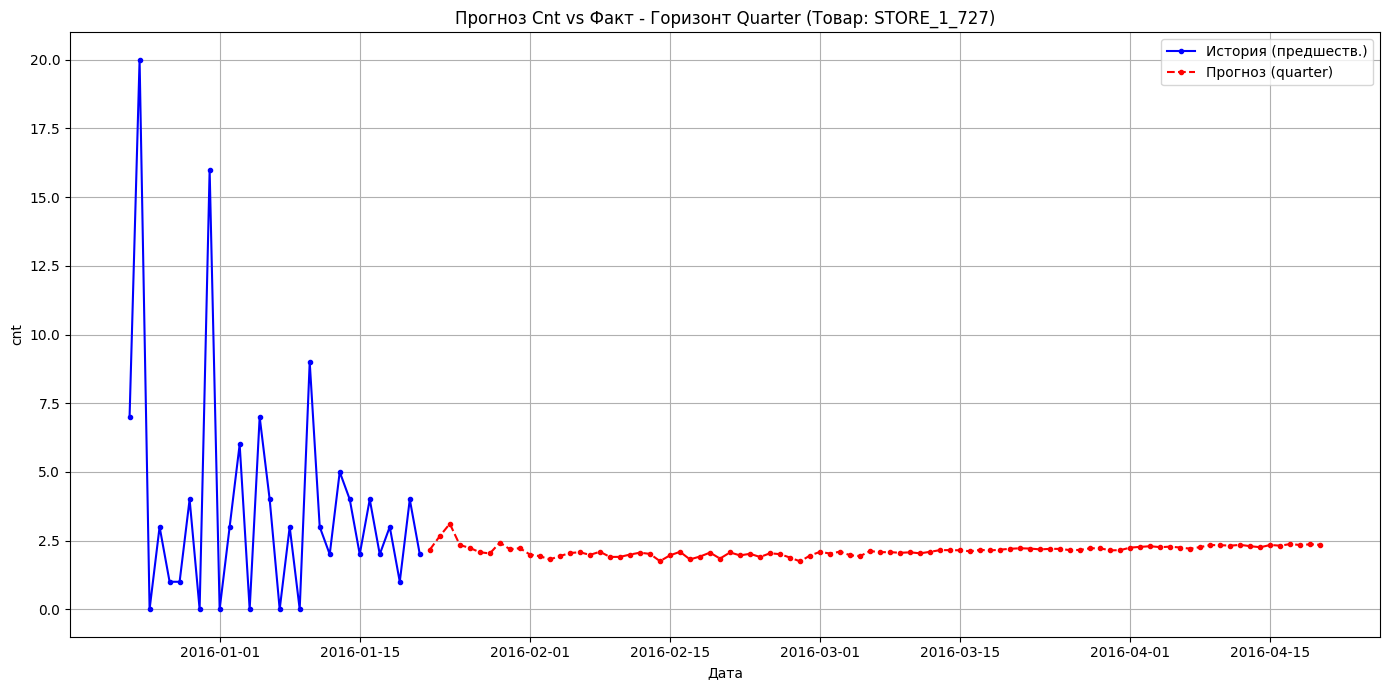


Оценка загруженной модели товара STORE_1_727 по тестовой выборке:
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_727_cnt_week.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_727_cnt_month.
Нет пересекающихся дат между прогнозом и фактом для оценки CatBoost_STORE_1_727_cnt_quarter.

=== Обработка всех товаров завершена ===

Нет валидных данных для сводки по метрикам (оценка не проводилась или не удалась).

Итоговый прогноз на week:
  Размер: (105, 3)
  Товаров: 15
  Период: 2016-01-22 по 2016-01-28

Итоговый прогноз на month:
  Размер: (450, 3)
  Товаров: 15
  Период: 2016-01-22 по 2016-02-20

Итоговый прогноз на quarter:
  Размер: (1350, 3)
  Товаров: 15
  Период: 2016-01-22 по 2016-04-20

--- Скрипт прогнозирования завершен ---


In [ ]:
import os
import sys
import pandas as pd
from forecasters import BestForecaster

# Конфигурация Скрипта
DATA_DIR = 'data'
MODELS_DIR = 'models'
SALES_FILE = os.path.join(DATA_DIR, 'shop_sales.csv')
PRICES_FILE = os.path.join(DATA_DIR, 'shop_sales_prices.csv')
DATES_FILE = os.path.join(DATA_DIR, 'shop_sales_dates.csv')

STORE_ID_TO_PROCESS = 'STORE_1'
TARGET_COLUMN = 'cnt'
HORIZONS_TO_PREDICT = ['week', 'month', 'quarter']
TEST_SPLIT_SIZE = 0.2

#Начало выполнения скрипта
print("--- Запуск скрипта прогнозирования ---")
# Убедимся, что директория для моделей существует
os.makedirs(MODELS_DIR, exist_ok=True)

# 1. Инициализация прогнозировщика
forecaster = BestForecaster(models_dir=MODELS_DIR)
forecaster.test_split_size = TEST_SPLIT_SIZE
print(f"Прогнозировщик для директории '{MODELS_DIR}' инициализирован.")

# 2. Загрузка и предобработка данных
print(f"\nЗагрузка и предобработка данных для магазина: {STORE_ID_TO_PROCESS}...")
forecaster.load_and_preprocess_data(
    SALES_FILE,
    PRICES_FILE,
    DATES_FILE,
    store_id=STORE_ID_TO_PROCESS
)

# Проверка наличия товаров после предобработки
if not forecaster.items:
     print(f"\nПредупреждение: Нет валидных товаров для магазина {STORE_ID_TO_PROCESS} "
           f"после предобработки. Завершение работы.")
     sys.exit(0)

# 3. Запуск прогнозирования для всех товаров
print(f"\nЗапуск обработки для {len(forecaster.items)} товаров магазина {STORE_ID_TO_PROCESS}...")
aggregated_forecasts = forecaster.predict_all_items(
    target_col=TARGET_COLUMN,
    horizons=HORIZONS_TO_PREDICT,
    items_limit=None
)

# результаты предсказаний - aggregated_forecasts
print("\n--- Скрипт прогнозирования завершен ---")